<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster.


## Answer

I followed Reference given in In_class_Exercis-4 to completed question-1, Attaching reference below:
    
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here
#Import Packages
import pandas as pd
import numpy as np


import re
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
df = pd.read_csv("Annotated_John_wick_Reviews.csv")
df.head()

,document_id,clean_text,sentiment
0,0,imagin video game shoot bad guy hardwar old ev...,negative
1,1,tabl intern crminal brotherhood condemn john w...,positive
2,2,first three john wick film came fairli quick s...,neutral
3,3,john wick movi sort fun sen unintellig violent...,negative
4,4,went cinema great expect admit photographi gor...,positive


In [3]:
# checking value count of each class in sentiment column
df["sentiment"].value_counts()

sentiment
positive    700
negative    450
neutral     100
Name: count, dtype: int64

In [4]:
df.isnull().sum()

document_id    0
clean_text     0
sentiment      0
dtype: int64

#### Features (text representation) used for topic modeling.

The chosen feature, "clean_text," is essential in discerning sentiments expressed in reviews or comments, providing valuable insights for further analysis or decision-making. For sentimental analysis, the selected feature is the "clean_text" column. This column contains preprocessed and cleaned textual data, making it suitable for sentiment analysis.

In [5]:
# Converting feature column to list 
data = df.clean_text.values.tolist()

# Removing Emails single quotes from the data
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Removing new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Removing distracting single quotes from the data
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['imagin video game shoot bad guy hardwar old everyth kind slow focu oppon set '
 'easi instal hack give invinc autoaim come slowli shout open weapon fire '
 'three four bullet run shoot anyth anyway use sniper explos trap kind cant '
 'even hit theyr next wield knife tri fight decent manner yet avatar move like '
 'year old man even autoaim still suck somehow get mani separ level noth make '
 'sen get big cinemat take cinemat k whatev feel like slow motionthat friend '
 'experi watch jw style peopl applaud first movi turn dement caricatur fight '
 'scene ridicul bad action charact make sen world describ make sen even '
 'tongueincheek refer matrix dont hit know enjoy film your make feel old film '
 'three hour irrelevanceand among peopl cant understand rate film anyth bore '
 'watch end credit scene destroy littl joy might kept watch thisbottom line '
 'mani talent peopl work film board imagin wors outcom even funni sad']


In [6]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['imagin', 'video', 'game', 'shoot', 'bad', 'guy', 'hardwar', 'old', 'everyth', 'kind', 'slow', 'focu', 'oppon', 'set', 'easi', 'instal', 'hack', 'give', 'invinc', 'autoaim', 'come', 'slowli', 'shout', 'open', 'weapon', 'fire', 'three', 'four', 'bullet', 'run', 'shoot', 'anyth', 'anyway', 'use', 'sniper', 'explos', 'trap', 'kind', 'cant', 'even', 'hit', 'theyr', 'next', 'wield', 'knife', 'tri', 'fight', 'decent', 'manner', 'yet', 'avatar', 'move', 'like', 'year', 'old', 'man', 'even', 'autoaim', 'still', 'suck', 'somehow', 'get', 'mani', 'separ', 'level', 'noth', 'make', 'sen', 'get', 'big', 'cinemat', 'take', 'cinemat', 'whatev', 'feel', 'like', 'slow', 'motionthat', 'friend', 'experi', 'watch', 'jw', 'style', 'peopl', 'applaud', 'first', 'movi', 'turn', 'dement', 'caricatur', 'fight', 'scene', 'ridicul', 'bad', 'action', 'charact', 'make', 'sen', 'world', 'describ', 'make', 'sen', 'even', 'tongueincheek', 'refer', 'matrix', 'dont', 'hit', 'know', 'enjoy', 'film', 'your', 'make', 'fe

In [7]:
# Building the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['imagin', 'video', 'game', 'shoot', 'bad', 'guy', 'hardwar', 'old', 'everyth', 'kind', 'slow', 'focu', 'oppon', 'set', 'easi', 'instal', 'hack', 'give', 'invinc', 'autoaim', 'come', 'slowli', 'shout', 'open', 'weapon', 'fire', 'three', 'four', 'bullet', 'run', 'shoot', 'anyth', 'anyway', 'use', 'sniper', 'explos', 'trap', 'kind', 'cant', 'even', 'hit', 'theyr', 'next', 'wield', 'knife', 'tri', 'fight', 'decent', 'manner', 'yet', 'avatar', 'move', 'like', 'year', 'old', 'man', 'even', 'autoaim', 'still', 'suck', 'somehow', 'get', 'mani', 'separ', 'level', 'noth', 'make', 'sen', 'get', 'big', 'cinemat', 'take', 'cinemat', 'whatev', 'feel', 'like', 'slow', 'motionthat', 'friend', 'experi', 'watch', 'jw', 'style', 'peopl', 'applaud', 'first', 'movi', 'turn', 'dement', 'caricatur', 'fight', 'scene', 'ridicul', 'bad', 'action', 'charact', 'make', 'sen', 'world', 'describ', 'make', 'sen', 'even', 'tongueincheek', 'refer', 'matrix', 'dont', 'hit', 'know', 'enjoy', 'film', 'your', 'make', 'fee

In [8]:
# Defining functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [9]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])


[['imagin', 'video', 'game', 'shoot', 'bad', 'guy', 'old', 'kind', 'slow', 'focu', 'oppon', 'set', 'easi', 'instal', 'hack', 'give', 'autoaim', 'come', 'slowli', 'shout', 'open', 'weapon', 'fire', 'bullet', 'run', 'shoot', 'sniper', 'trap', 'kind', 'even', 'hit', 'next', 'knife', 'fight', 'decent', 'manner', 'avatar', 'move', 'year', 'old', 'man', 'even', 'autoaim', 'still', 'suck', 'somehow', 'get', 'separ', 'level', 'noth', 'make', 'get', 'big', 'cinemat', 'take', 'cinemat', 'whatev', 'feel', 'slow', 'friend', 'watch', 'style', 'turn', 'dement', 'caricatur', 'fight', 'scene', 'ridicul', 'bad', 'action', 'charact', 'make', 'world', 'make', 'even', 'refer', 'matrix', 'hit', 'know', 'enjoy', 'film', 'make', 'feel', 'old', 'film', 'hour', 'irrelevanceand', 'peopl', 'understand', 'rate', 'film', 'watch', 'end', 'credit', 'scene', 'destroy', 'joy', 'keep', 'watch', 'thisbottom', 'line', 'talent', 'peopl', 'work', 'wor', 'even']]


In [10]:
# Creating Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Creating  Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 4), (18, 2), (19, 2), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 4), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 3), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 2), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 3), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1)]]


In [11]:
id2word[0]

'action'

In [12]:
id2word[1]

'autoaim'

In [13]:
id2word[10]

'credit'

In [14]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('action', 1),
  ('autoaim', 2),
  ('avatar', 1),
  ('bad', 2),
  ('big', 1),
  ('bullet', 1),
  ('caricatur', 1),
  ('charact', 1),
  ('cinemat', 2),
  ('come', 1),
  ('credit', 1),
  ('decent', 1),
  ('dement', 1),
  ('destroy', 1),
  ('easi', 1),
  ('end', 1),
  ('enjoy', 1),
  ('even', 4),
  ('feel', 2),
  ('fight', 2),
  ('film', 3),
  ('fire', 1),
  ('focu', 1),
  ('friend', 1),
  ('game', 1),
  ('get', 2),
  ('give', 1),
  ('guy', 1),
  ('hack', 1),
  ('hit', 2),
  ('hour', 1),
  ('imagin', 1),
  ('instal', 1),
  ('irrelevanceand', 1),
  ('joy', 1),
  ('keep', 1),
  ('kind', 2),
  ('knife', 1),
  ('know', 1),
  ('level', 1),
  ('line', 1),
  ('make', 4),
  ('man', 1),
  ('manner', 1),
  ('matrix', 1),
  ('move', 1),
  ('next', 1),
  ('noth', 1),
  ('old', 3),
  ('open', 1),
  ('oppon', 1),
  ('peopl', 2),
  ('rate', 1),
  ('refer', 1),
  ('ridicul', 1),
  ('run', 1),
  ('scene', 2),
  ('separ', 1),
  ('set', 1),
  ('shoot', 2),
  ('shout', 1),
  ('slow', 2),
  ('slowli', 1),
 

In [15]:
 #Building the Topic Model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [16]:
# Viewing the topics in LDA model

# Printing the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.036*"film" + 0.029*"action" + 0.025*"great" + 0.021*"play" + 0.018*"see" '
  '+ 0.018*"martial" + 0.018*"chapter" + 0.018*"role" + 0.018*"wick" + '
  '0.014*"prior"'),
 (1,
  '0.060*"action" + 0.030*"scene" + 0.025*"feel" + 0.025*"movi" + '
  '0.020*"fight" + 0.015*"everi" + 0.015*"still" + 0.015*"see" + 0.015*"time" '
  '+ 0.010*"open"'),
 (2,
  '0.040*"get" + 0.040*"script" + 0.020*"fill" + 0.020*"forget" + '
  '0.020*"sequel" + 0.020*"guess" + 0.020*"seem" + 0.020*"heroal" + '
  '0.020*"gener" + 0.020*"drama"'),
 (3,
  '0.024*"action" + 0.018*"well" + 0.018*"know" + 0.018*"film" + 0.018*"say" + '
  '0.012*"nice" + 0.012*"think" + 0.012*"suit" + 0.012*"man" + '
  '0.012*"warrior"'),
 (4,
  '0.054*"great" + 0.054*"film" + 0.054*"action" + 0.054*"count" + 0.036*"get" '
  '+ 0.036*"kill" + 0.018*"jason" + 0.018*"bodi" + 0.018*"work" + 0.018*"day"'),
 (5,
  '0.055*"film" + 0.039*"go" + 0.024*"incred" + 0.024*"hour" + 0.024*"sequenc" '
  '+ 0.024*"action" + 0.016*"wick" + 0.016*

In [17]:
#Computing Model Perplexity and Coherence Score
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Computing Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -4.712357184780453

Coherence Score:  0.5228857041385434


#### Visualize the topics-keywords

In [18]:
# Visualizing the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.082202 -0.022502       1        1  12.902369
0      0.113594 -0.131116       2        1  11.076263
1      0.010947  0.029188       3        1   7.900382
12     0.098600  0.015523       4        1   7.620465
3      0.034025  0.037018       5        1   6.508885
14    -0.028165  0.113798       6        1   6.507150
6     -0.005150  0.010912       7        1   6.507143
16     0.131772 -0.035399       8        1   6.471274
11     0.074043 -0.046685       9        1   5.875796
5      0.062462  0.060756      10        1   5.002410
13     0.085083  0.074299      11        1   4.484274
19    -0.288985 -0.065718      12        1   4.367261
18    -0.046991 -0.003024      13        1   4.208465
10     0.049765  0.187584      14        1   2.699908
4      0.036020  0.020559      15        1   2.183833
17    -0.281760  0.016685      16        1   2.064761
2     -0.228987  0.004365      17        1   1.945594
8      0.034665  0.237118      18        1   1.667740
9      0.033431 -0.251680      19        1   0.003018
15     0.033431 -0.251680      20        1   0.003009, topic_info=      Term         Freq        Total Category  logprob  loglift
20    film  3382.000000  3382.000000  Default  30.0000  30.0000
114   movi  1337.000000  1337.000000  Default  29.0000  29.0000
278  great  1044.000000  1044.000000  Default  28.0000  28.0000
25     get  2484.000000  2484.000000  Default  27.0000  27.0000
396   kill   843.000000   843.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
25     get     0.004066  2484.925084  Topic20  -6.8373  -2.9117
26    give     0.004066   298.559026  Topic20  -6.8373  -0.7927
27     guy     0.004066   447.707306  Topic20  -6.8373  -1.1978
28    hack     0.004066    50.469184  Topic20  -6.8373   0.9849
29     hit     0.004066   398.569942  Topic20  -6.8373  -1.0816

[1115 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
601       1  0.665048  absolut
601       4  0.332524  absolut
765       2  0.994319   accept
683       1  0.985073      ace
138       9  0.334999      act
...     ...       ...      ...
136       3  0.200829      yet
136       6  0.200829      yet
136      11  0.200829      yet
136      15  0.196813      yet
581      12  0.990399    young

[1385 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 2, 13, 4, 15, 7, 17, 12, 6, 14, 20, 19, 11, 5, 18, 3, 9, 10, 16])

#### Building LDA Mallet Model

In [19]:
pwd()

'/Users/shyamsonu/Downloads/Assignment-4'

In [20]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

In [21]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

mallet_path = "/Users/shyamsonu/Downloads/Assignment-4/mallet-2.0.8/bin/mallet"


zsh:1: command not found: wget
Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
  inflating: mallet-2.0.8/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/mallet-2.0.8/
  inflating: __MACOSX/mallet-2.0.8/._.DS_Store  
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
   creating: __MACOSX/mallet-2.0.8/bin/
  inflating: __MACOSX/mallet-2.0.8/bin/._classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: __MACOSX/mallet-2.0.8/bin/._csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: __MACOSX/mallet-2.0.8/bin/._csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: __MACOSX/mallet-2.0.8/bin/._mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: __MACOSX/mallet-2.0.8/bin/._mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: __MACOSX/mallet-2.0.8/bin/._mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: __MACOSX/mallet-2.0.8/bin/._prepend-license.sh

  inflating: mallet-2.0.8/class/cc/mallet/classify/tui/Vectors2Info.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/classify/tui/._Vectors2Info.class  
  inflating: mallet-2.0.8/class/cc/mallet/classify/tui/Vectors2Vectors.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/classify/tui/._Vectors2Vectors.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/classify/._tui  
  inflating: mallet-2.0.8/class/cc/mallet/classify/Winnow.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/classify/._Winnow.class  
  inflating: mallet-2.0.8/class/cc/mallet/classify/WinnowTrainer.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/classify/._WinnowTrainer.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/._classify  
   creating: mallet-2.0.8/class/cc/mallet/cluster/
  inflating: mallet-2.0.8/class/cc/mallet/cluster/Clusterer.class  
   creating: __MACOSX/mallet-2.0.8/class/cc/mallet/cluster/
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/cluste

  inflating: mallet-2.0.8/class/cc/mallet/fst/LabelDistributionEvaluator.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/fst/._LabelDistributionEvaluator.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/MaxLattice.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/fst/._MaxLattice.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/MaxLatticeDefault$1.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/fst/._MaxLatticeDefault$1.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/MaxLatticeDefault$Factory.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/fst/._MaxLatticeDefault$Factory.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/MaxLatticeDefault$ViterbiNode$PreviousStateIterator.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/fst/._MaxLatticeDefault$ViterbiNode$PreviousStateIterator.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/MaxLatticeDefault$ViterbiNode.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/malle

  inflating: mallet-2.0.8/class/cc/mallet/grmm/inference/TRP.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/grmm/inference/._TRP.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/inference/Utils.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/grmm/inference/._Utils.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/inference/VariableElimination.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/grmm/inference/._VariableElimination.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/grmm/._inference  
   creating: mallet-2.0.8/class/cc/mallet/grmm/learning/
  inflating: mallet-2.0.8/class/cc/mallet/grmm/learning/ACRF$BigramTemplate.class  
   creating: __MACOSX/mallet-2.0.8/class/cc/mallet/grmm/learning/
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/grmm/learning/._ACRF$BigramTemplate.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/learning/ACRF$FixedFactorTemplate.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/grmm/

  inflating: mallet-2.0.8/class/cc/mallet/pipe/AddClassifierTokenPredictions$TokenClassifiers.class  
   creating: __MACOSX/mallet-2.0.8/class/cc/mallet/pipe/
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/pipe/._AddClassifierTokenPredictions$TokenClassifiers.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/AddClassifierTokenPredictions.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/pipe/._AddClassifierTokenPredictions.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/Array2FeatureVector.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/pipe/._Array2FeatureVector.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/AugmentableFeatureVectorAddConjunctions.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/pipe/._AugmentableFeatureVectorAddConjunctions.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/AugmentableFeatureVectorLogScale.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/pipe/._AugmentableFeatureVectorLogScale.class 

   creating: mallet-2.0.8/class/cc/mallet/share/weili/ner/enron/
  inflating: mallet-2.0.8/class/cc/mallet/share/weili/ner/enron/EnronMessage2TokenSequence.class  
   creating: __MACOSX/mallet-2.0.8/class/cc/mallet/share/weili/
   creating: __MACOSX/mallet-2.0.8/class/cc/mallet/share/weili/ner/
   creating: __MACOSX/mallet-2.0.8/class/cc/mallet/share/weili/ner/enron/
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/share/weili/ner/enron/._EnronMessage2TokenSequence.class  
  inflating: mallet-2.0.8/class/cc/mallet/share/weili/ner/enron/TUI.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/share/weili/ner/enron/._TUI.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/share/weili/ner/._enron  
  inflating: mallet-2.0.8/class/cc/mallet/share/weili/ner/WordTransformation.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/share/weili/ner/._WordTransformation.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/share/weili/._ner  
  inflating: __MACOSX/mallet

  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/util/._CollectionUtils$Fn.class  
  inflating: mallet-2.0.8/class/cc/mallet/util/CollectionUtils.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/util/._CollectionUtils.class  
  inflating: mallet-2.0.8/class/cc/mallet/util/ColorUtils.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/util/._ColorUtils.class  
  inflating: mallet-2.0.8/class/cc/mallet/util/CommandOption$1.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/util/._CommandOption$1.class  
  inflating: mallet-2.0.8/class/cc/mallet/util/CommandOption$Boolean.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/util/._CommandOption$Boolean.class  
  inflating: mallet-2.0.8/class/cc/mallet/util/CommandOption$Double.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/util/._CommandOption$Double.class  
  inflating: mallet-2.0.8/class/cc/mallet/util/CommandOption$DoubleArray.class  
  inflating: __MACOSX/mallet-2.0.8/class/cc/mallet/util/.

  inflating: mallet-2.0.8/dist/mallet.jar  
  inflating: __MACOSX/mallet-2.0.8/dist/._mallet.jar  
  inflating: __MACOSX/mallet-2.0.8/._dist  
   creating: mallet-2.0.8/lib/
  inflating: mallet-2.0.8/lib/bsh.jar  
   creating: __MACOSX/mallet-2.0.8/lib/
  inflating: __MACOSX/mallet-2.0.8/lib/._bsh.jar  
  inflating: mallet-2.0.8/lib/derby.jar  
  inflating: __MACOSX/mallet-2.0.8/lib/._derby.jar  
  inflating: mallet-2.0.8/lib/grmm-deps.jar  
  inflating: __MACOSX/mallet-2.0.8/lib/._grmm-deps.jar  
  inflating: mallet-2.0.8/lib/jdom-1.0.jar  
  inflating: __MACOSX/mallet-2.0.8/lib/._jdom-1.0.jar  
  inflating: mallet-2.0.8/lib/jgrapht-0.6.0.jar  
  inflating: __MACOSX/mallet-2.0.8/lib/._jgrapht-0.6.0.jar  
  inflating: mallet-2.0.8/lib/junit-4.5.jar  
  inflating: __MACOSX/mallet-2.0.8/lib/._junit-4.5.jar  
  inflating: mallet-2.0.8/lib/jwnl-1.3.jar  
  inflating: __MACOSX/mallet-2.0.8/lib/._jwnl-1.3.jar  
  inflating: mallet-2.0.8/lib/LICENSES  
  inflating: __MACOSX/mallet-2.0.8/lib/.

  inflating: mallet-2.0.8/src/cc/mallet/classify/WinnowTrainer.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/classify/._WinnowTrainer.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/._classify  
   creating: mallet-2.0.8/src/cc/mallet/cluster/
  inflating: mallet-2.0.8/src/cc/mallet/cluster/Clusterer.java  
   creating: __MACOSX/mallet-2.0.8/src/cc/mallet/cluster/
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/cluster/._Clusterer.java  
  inflating: mallet-2.0.8/src/cc/mallet/cluster/Clustering.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/cluster/._Clustering.java  
   creating: mallet-2.0.8/src/cc/mallet/cluster/clustering_scorer/
  inflating: mallet-2.0.8/src/cc/mallet/cluster/clustering_scorer/ClusteringScorer.java  
   creating: __MACOSX/mallet-2.0.8/src/cc/mallet/cluster/clustering_scorer/
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/cluster/clustering_scorer/._ClusteringScorer.java  
  inflating: mallet-2.0.8/src/cc/mallet/cluster/clustering_sco

  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/fst/._semi_supervised  
  inflating: mallet-2.0.8/src/cc/mallet/fst/ShallowTransducerTrainer.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/fst/._ShallowTransducerTrainer.java  
  inflating: mallet-2.0.8/src/cc/mallet/fst/SimpleTagger.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/fst/._SimpleTagger.java  
  inflating: mallet-2.0.8/src/cc/mallet/fst/SumLattice.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/fst/._SumLattice.java  
  inflating: mallet-2.0.8/src/cc/mallet/fst/SumLatticeBeam.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/fst/._SumLatticeBeam.java  
  inflating: mallet-2.0.8/src/cc/mallet/fst/SumLatticeConstrained.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/fst/._SumLatticeConstrained.java  
  inflating: mallet-2.0.8/src/cc/mallet/fst/SumLatticeDefault.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/fst/._SumLatticeDefault.java  
  inflating: mallet-2.0.8/src/cc/mallet/f

   creating: __MACOSX/mallet-2.0.8/src/cc/mallet/optimize/tests/
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/optimize/tests/._package.html  
  inflating: mallet-2.0.8/src/cc/mallet/optimize/tests/TestOptimizable.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/optimize/tests/._TestOptimizable.java  
  inflating: mallet-2.0.8/src/cc/mallet/optimize/tests/TestOptimizer.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/optimize/tests/._TestOptimizer.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/optimize/._tests  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/._optimize  
   creating: mallet-2.0.8/src/cc/mallet/pipe/
  inflating: mallet-2.0.8/src/cc/mallet/pipe/AddClassifierTokenPredictions.java  
   creating: __MACOSX/mallet-2.0.8/src/cc/mallet/pipe/
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/pipe/._AddClassifierTokenPredictions.java  
  inflating: mallet-2.0.8/src/cc/mallet/pipe/Array2FeatureVector.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mall

  inflating: mallet-2.0.8/src/cc/mallet/topics/ParallelTopicModel.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/topics/._ParallelTopicModel.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/PolylingualTopicModel.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/topics/._PolylingualTopicModel.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/RTopicModel.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/topics/._RTopicModel.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/SimpleLDA.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/topics/._SimpleLDA.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/TopicalNGrams.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/topics/._TopicalNGrams.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/TopicAssignment.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/topics/._TopicAssignment.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/TopicInferencer.java  
  inflating: __MACOSX/mallet-2

  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/util/._Strings.java  
   creating: mallet-2.0.8/src/cc/mallet/util/tests/
  inflating: mallet-2.0.8/src/cc/mallet/util/tests/package.html  
   creating: __MACOSX/mallet-2.0.8/src/cc/mallet/util/tests/
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/util/tests/._package.html  
  inflating: mallet-2.0.8/src/cc/mallet/util/tests/TestAStar.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/util/tests/._TestAStar.java  
  inflating: mallet-2.0.8/src/cc/mallet/util/tests/TestMaths.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/util/tests/._TestMaths.java  
  inflating: mallet-2.0.8/src/cc/mallet/util/tests/TestPriorityQueue.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/util/tests/._TestPriorityQueue.java  
  inflating: mallet-2.0.8/src/cc/mallet/util/tests/TestPropertyList.java  
  inflating: __MACOSX/mallet-2.0.8/src/cc/mallet/util/tests/._TestPropertyList.java  
  inflating: mallet-2.0.8/src/cc/mallet/util/tests/Test

In [22]:
from gensim.models.wrappers import LdaMallet


In [23]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)


Mallet LDA: 20 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 265
total tokens: 103800
<10> LL/token: -6.49695
<20> LL/token: -5.8871
<30> LL/token: -5.77562
<40> LL/token: -5.72607

0	2.5	film bad fight back final die edit poor pace end scene start minut bit long guy step forward relea hope 
1	2.5	fight everi great watch usual impress computergener storylin unbeliev move scene long action blind flick entri artist perfect day choreographi 
2	2.5	action scene feel movi fight everi time creativ amaz hit open car screen exampl view learn entir shot ultrascreen landmark 
3	2.5	kill man head wick everyon idea blind warrior suit send time bullet jacket good bodi min ridicul drop stupid stand 
4	2.5	action plot chapter movi nice setpiec motiv instal dumb remark level love end basic fourth ye marqui enjoy actual write 
5	2.5	hour good long feel film minut lose fight annoy peopl word time club scene thing belief hit skeptic shock scoff 
6	2.5	action shoot scene dog alreadi bad 

<190> LL/token: -5.61548

0	2.5	film bad back final die end poor pace edit start minut long bit annoy fight scene forward villain whop night 
1	2.5	fight everi unbeliev storylin great watch impress computergener usual move action anyon day artist mission flick thrill involv perfect hard 
2	2.5	action scene feel movi fight everi amaz view time open shot creativ style screen learn exampl entir ultrascreen landmark half 
3	2.5	kill man head everyon wick idea blind warrior suit send bullet min ridicul hear rate count bodi drop good stand 
4	2.5	action chapter plot nice instal movi setpiec motiv dumb enjoy end ridicul case thing addit level fourth final ye definit 
5	2.5	hour fight good feel long scene minut peopl time write lose thing hit weak great plot short pointless drop find 
6	2.5	shoot bad dog wor make love fall scene alreadi wick real height money top opinion cool polic jacket bother stop 
7	2.5	action good great wick chapter sequenc start sequel probabl hand compani fall howev eve

<360> LL/token: -5.61766
<370> LL/token: -5.61513
<380> LL/token: -5.61724
<390> LL/token: -5.61322

0	2.5	film bad back final die poor pace minut end edit start bit annoy long night whop villain step guy word 
1	2.5	fight everi great watch unbeliev storylin move impress computergener usual action choreographi artist anyon flick involv day genuin make blind 
2	2.5	action scene feel movi fight everi time creativ car amaz hit learn view screen open ultrascreen landmark half flaw exampl 
3	2.5	man kill head everyon wick idea bullet blind warrior suit send shoot high time bodi min jacket drop ridicul stand 
4	2.5	action plot instal chapter nice setpiec motiv dumb movi addit end ridicul enjoy lack charact love definit aspect marqui basic 
5	2.5	hour fight scene long good feel time minut weak review leg write head reload worth touch deadli 
6	2.5	shoot bad wor fall make scene love dog great movi alreadi real money height top wick polic stop bother spend 
7	2.5	action good wick great chapter 

<560> LL/token: -5.61067
<570> LL/token: -5.60923
<580> LL/token: -5.61079
<590> LL/token: -5.60715

0	2.5	film bad back final die end edit start minut pace poor bit annoy long forward step word rank nerv climat 
1	2.5	everi great fight watch unbeliev storylin impress computergener move usual day masterpiec involv anyon genuin turn action screenplay flick thrill 
2	2.5	action scene feel movi everi fight time creativ amaz open hit view learn entir shot screen exampl car ultrascreen landmark 
3	2.5	kill man head everyon wick idea bullet blind warrior suit send time shoot ridicul min bodi rate count writer wear 
4	2.5	action plot chapter dumb instal nice setpiec motiv movi ridicul love lack marqui peopl definit runtim charact addit write level 
5	2.5	fight hour scene long good feel time minut write review leg weak head curtain height 
6	2.5	shoot bad make wor fall scene love movi great alreadi dog real money height cool wick stop opinion polic spend 
7	2.5	action good time wick great star

<760> LL/token: -5.60489
<770> LL/token: -5.60829
<780> LL/token: -5.60581
<790> LL/token: -5.60687

0	2.5	film bad back final die start minut poor pace edit end good bit annoy long villain night whop word rank 
1	2.5	everi action fight great watch unbeliev usual impress computergener storylin move mission artist entri choreographi make blind flick break attack 
2	2.5	action scene feel movi everi fight time view creativ hit open entir ultrascreen learn landmark half flaw shot style screen 
3	2.5	kill man head everyon wick idea time bullet blind warrior suit send shoot min hear stand writer wear skip read 
4	2.5	action plot chapter instal dumb setpiec motiv nice movi write ridicul marqui end thing lack fourth case level peopl love 
5	2.5	fight hour scene long feel minut review write weak leg head good shock odd meet frustrat bitter deal 
6	2.5	shoot bad wor movi love fall make wick dog great scene alreadi real money opinion height stop jacket cool top 
7	2.5	action good time movi wick g

<960> LL/token: -5.6058
<970> LL/token: -5.60298
<980> LL/token: -5.60243
<990> LL/token: -5.60707

0	2.5	film bad back final die minut start poor edit pace end long good annoy bit stori forward villain guy step 
1	2.5	action great everi fight watch unbeliev impress computergener anyon flick move artist entri involv choreographi perfect mission make screenplay day 
2	2.5	action scene feel movi everi fight time creativ view exampl entir hit style ultrascreen screen landmark half flaw open learn 
3	2.5	kill man head everyon wick time idea bullet blind warrior suit send shoot rate bodi good ridicul guy hear count 
4	2.5	action chapter plot nice instal setpiec motiv dumb movi love peopl end fourth addit level enjoy write basic lack case 
5	2.5	hour fight scene long feel storylin usual weak leg minut write head review gun short reload mma headfor gap charactersy 
6	2.5	shoot bad scene wor make fall love dog wick great movi money real alreadi height polic opinion jacket bother spend 
7	2.5	a

In [24]:
# Showing Topics
pprint(ldamallet.show_topics(formatted=False))

# Computing Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


[(9,
  [('movi', 0.22946495855312735),
   ('wick', 0.11981914091936699),
   ('action', 0.07837226827430294),
   ('time', 0.0587792012057272),
   ('set', 0.044461190655614165),
   ('feel', 0.039562923888470235),
   ('chapter', 0.03918613413715147),
   ('good', 0.03240391861341371),
   ('thing', 0.028636021100226075),
   ('expect', 0.027882441597588545)]),
 (12,
  [('count', 0.03665623603039785),
   ('nonsen', 0.033974072418417524),
   ('great', 0.029503799731783638),
   ('show', 0.022798390701832812),
   ('fake', 0.022574877067501116),
   ('pay', 0.022351363433169423),
   ('rest', 0.022351363433169423),
   ('score', 0.022351363433169423),
   ('plot', 0.019222172552525705),
   ('love', 0.017657577112203844)]),
 (10,
  [('good', 0.03714177978883861),
   ('expect', 0.02828054298642534),
   ('action', 0.02017345399698341),
   ('complet', 0.019419306184012067),
   ('craft', 0.019230769230769232),
   ('quit', 0.019042232277526393),
   ('product', 0.01885369532428356),
   ('big', 0.01885369532

In [25]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [26]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

Mallet LDA: 2 topics, 1 topic bits, 1 topic mask
Data loaded.
max tokens: 265
total tokens: 103800
<10> LL/token: -6.48733
<20> LL/token: -6.26381
<30> LL/token: -6.23636
<40> LL/token: -6.22736

0	25	action movi scene shoot wick feel time fight good everi set man big expect love idea dumb make alreadi hit 
1	25	film fight bad hour great kill good scene chapter make wick start long action play guy time end minut bullet 

<50> LL/token: -6.22213
<60> LL/token: -6.2224
<70> LL/token: -6.22132
<80> LL/token: -6.21776
<90> LL/token: -6.22074

0	25	action movi scene shoot feel wick time fight everi good set man big expect love alreadi idea dumb end make 
1	25	film fight bad hour great good kill scene chapter make wick action long start play guy minut bullet watch time 

<100> LL/token: -6.22
<110> LL/token: -6.21879
<120> LL/token: -6.21676
<130> LL/token: -6.2135
<140> LL/token: -6.21545

0	25	action movi scene shoot wick feel time fight everi good set man make big end expect love alreadi 

<60> LL/token: -6.01835
<70> LL/token: -6.01182
<80> LL/token: -6.01695
<90> LL/token: -6.01152

0	6.25	action movi everi feel scene fight watch time nonsen shoot amaz unbeliev fake view creativ hit car day flick hour 
1	6.25	film action shoot make fight set feel great bad watch wor scene big bring kind standard cour dog charact find 
2	6.25	kill action head man plot time great movi everyon count love chapter write ridicul blind enjoy instal ye nice stupid 
3	6.25	scene action film idea dumb fight long wick act find decent parabellum give shoot real hour chapter year storylin ridicul 
4	6.25	action good wick movi expect stori craft height sequel film complet high quit time entri show endless hit rich compliment 
5	6.25	film bad hour fight long scene minut die final back end start pace poor good edit feel guy bit annoy 
6	6.25	film great chapter action play fight wick martial role art kill good bullet star prior scene life instal guy charact 
7	6.25	wick movi film hour peopl sequenc act

<460> LL/token: -6.01719
<470> LL/token: -6.01388
<480> LL/token: -6.01702
<490> LL/token: -6.01146

0	6.25	action everi movi feel scene fight watch time shoot nonsen unbeliev creativ view fake amaz day flick good style hit 
1	6.25	film action shoot fight make set feel bad great scene watch wor big bring kind standard dog charact cour slow 
2	6.25	kill action man head time plot everyon count love great movi ridicul chapter write instal enjoy make bullet nice stupid 
3	6.25	scene action film dumb idea hour fight decent long wick act chapter find give shoot real parabellum storylin year place 
4	6.25	action good wick movi film expect stori craft sequel high time complet height show entri quit great success endless rich 
5	6.25	film bad fight hour long minut scene back final die end start good poor edit pace feel guy bit annoy 
6	6.25	film great chapter action play fight wick martial kill role art good star prior scene bullet instal top charact life 
7	6.25	movi wick film hour peopl seque

<860> LL/token: -6.01683
<870> LL/token: -6.01975
<880> LL/token: -6.01928
<890> LL/token: -6.01374

0	6.25	action movi everi feel scene fight watch time shoot nonsen unbeliev fake creativ amaz view day car flick hit open 
1	6.25	film action shoot fight make feel set bad great scene watch wor big kind standard bring dog find charact end 
2	6.25	kill action man head time plot count great everyon love movi ridicul chapter write instal bullet enjoy stupid blind nice 
3	6.25	scene film action dumb idea hour fight decent long act chapter find wick shoot give real year parabellum storylin place 
4	6.25	action good wick movi expect stori film craft high time height complet sequel entri show quit endless rich compliment momentum 
5	6.25	film bad fight hour long scene back minut final die end good start edit poor pace guy feel bit annoy 
6	6.25	film great chapter action play fight martial wick kill role art good star scene prior bullet charact life instal top 
7	6.25	wick film hour movi peopl s

<160> LL/token: -5.81297
<170> LL/token: -5.8131
<180> LL/token: -5.81118
<190> LL/token: -5.81004

0	3.57143	film great action play chapter martial wick role star scene art prior good fight seri top charact instal presenc find 
1	3.57143	film rate sequenc start point incred hour script action everi runtim sequel alway love wick high seri reason blast fall 
2	3.57143	action scene feel movi fight everi time creativ open exampl view hit car shoot screen amaz learn style entir shot 
3	3.57143	great make everi scene fight watch wick action unbeliev wor move impress computergener shoot money opinion bad artist genuin dog 
4	3.57143	fight kill stori bullet end chapter bring set shoot lot plot alreadi choic sever dead sword stair fantast chanc forc 
5	3.57143	nonsen long decent fight storylin fake feel act movi bad score pay usual watch dumb head shoot fall real seri 
6	3.57143	kill man time wick head everyon shoot idea bullet warrior suit send blind good ye high ridicul movi rate dog 
7	3.57

<410> LL/token: -5.79978
<420> LL/token: -5.80046
<430> LL/token: -5.80159
<440> LL/token: -5.80301

0	3.57143	film great action play chapter martial role wick star art scene prior fight good seri charact top presenc instal gun 
1	3.57143	film sequenc rate point incred hour start script action sequel everi love alway runtim fall fight lot seri alreadi remain 
2	3.57143	action scene feel movi fight everi time creativ shoot hit screen amaz open exampl view style entir car shot learn 
3	3.57143	great everi action make fight watch wor scene unbeliev impress computergener bad shoot move wick money choreographi artist opinion cool 
4	3.57143	fight kill stori bullet chapter end bring lot shoot plot set real cour sever dead stair fantast chanc forc follow 
5	3.57143	nonsen long decent feel fake storylin movi bad act score pay usual fight dumb shoot weak watch head credit reason 
6	3.57143	kill man wick head time everyon shoot bullet idea blind warrior suit send high ridicul good guy dog bodi y

<660> LL/token: -5.8095
<670> LL/token: -5.80545
<680> LL/token: -5.81822
<690> LL/token: -5.80738

0	3.57143	film great play action chapter martial role wick fight scene art star prior good seri charact instal top presenc high 
1	3.57143	film rate point hour sequenc incred start everi script runtim sequel love alway action wick alreadi play seemingli forget belief 
2	3.57143	action scene feel movi fight everi time screen creativ open hit view exampl car shot amaz style learn entir ultrascreen 
3	3.57143	great everi action make fight watch scene wor unbeliev impress computergener bad move shoot fall wick money opinion artist real 
4	3.57143	fight film kill bullet stori end lot chapter shoot bring set plot endless dead throw choic stair fantast chanc forc 
5	3.57143	nonsen long feel decent fake storylin bad act score pay usual dumb fight watch head stupid shoot seri violent reason 
6	3.57143	kill man wick head everyon shoot time idea blind bullet warrior suit send ridicul good high guy 

<910> LL/token: -5.81044
<920> LL/token: -5.80982
<930> LL/token: -5.81086
<940> LL/token: -5.81247

0	3.57143	film great action play chapter wick martial role art star prior scene good fight seri charact top instal presenc find 
1	3.57143	film rate sequenc point hour incred start script love sequel runtim alway everi action seri belief fall lot give alreadi 
2	3.57143	action scene feel movi fight everi time open creativ screen exampl view hit shoot learn watch shot style car amaz 
3	3.57143	great everi fight make scene watch action shoot wor unbeliev impress computergener move wick bad money opinion artist mission flick 
4	3.57143	fight film kill stori bullet end chapter bring plot lot set shoot alreadi choic violent throw stair fantast chanc sever 
5	3.57143	nonsen long decent hour feel storylin fake score pay act bad usual shoot fight dumb head watch fall weak scene 
6	3.57143	kill man time head wick everyon shoot idea blind bullet good warrior suit send guy ridicul dog ye stupid hi

<110> LL/token: -5.63796
<120> LL/token: -5.63536
<130> LL/token: -5.63584
<140> LL/token: -5.63153

0	2.5	show feel expect chapter complet movi rest height fall basic quit product sequel entri moment case lose hand definit alreadi 
1	2.5	action good life time charact bad start great sequenc probabl wick cast jason point matrix sound treat shotgun share scheme 
2	2.5	film dumb chapter parabellum runtim fourth enjoy setpiec motiv place overthetop anyth year actual idea success nice line ridicul final 
3	2.5	great kill idea everyon count film bullet man warrior suit send bodi make high find ridicul wick rate head enjoy 
4	2.5	action wick film high stori time rich compliment good thing write aspect addit guy emot charact nice absolut mind dialogu 
5	2.5	good long film usual craft storylin view differ big write leg forget expect polic pair marqui belief weak give success 
6	2.5	great action everi watch unbeliev fight involv impress computergener day make artist entri choreographi attack br

<310> LL/token: -5.6174
<320> LL/token: -5.62069
<330> LL/token: -5.61552
<340> LL/token: -5.61624

0	2.5	show expect feel chapter complet rest sequel basic parabellum becam success fall fourth hit comic true stunt order definit product 
1	2.5	action good hour time movi bad charact start wick jason point great sequenc life probabl enjoy run cast sound amaz 
2	2.5	film dumb chapter year setpiec motiv runtim place overthetop anyth nice fourth actual line parabellum success final enjoy idea ridicul 
3	2.5	film great everyon kill idea count bullet warrior suit send man bodi find make high wick rate good enjoy ridicul 
4	2.5	action film wick stori high time rich compliment good write height dialogu addit build noth entri bear easili nice emot 
5	2.5	good long film storylin craft usual view start forget differ marqui full industri write lack polic remain success reev fine 
6	2.5	great fight everi action unbeliev watch impress computergener involv day make artist thrill flick entri mission ma

<510> LL/token: -5.60909
<520> LL/token: -5.61373
<530> LL/token: -5.61488
<540> LL/token: -5.61113

0	2.5	show expect chapter feel complet movi definit alreadi fourth parabellum quit basic stunt sequel order compani howev becam happen success 
1	2.5	action good time hour movi start charact wick sequenc great point jason cast bad sound life amaz probabl matrix treat 
2	2.5	film dumb chapter actual line setpiec motiv place overthetop anyth find success fourth runtim parabellum year nice plot idea final 
3	2.5	great kill everyon film idea count bullet man warrior suit send bodi high head find rate enjoy jacket ridicul make 
4	2.5	wick action film high stori good rich compliment time write entri hit mind sequel nice addit top build absolut screen 
5	2.5	good film long storylin craft usual write expect forget big differ lack view product polic marqui reev quit belief review 
6	2.5	great everi fight unbeliev watch impress computergener action involv day make relea blind flick choreographi a

<710> LL/token: -5.61382
<720> LL/token: -5.60956
<730> LL/token: -5.61073
<740> LL/token: -5.61301

0	2.5	show feel chapter expect complet fall definit basic movi rest flick parabellum wrong moment true sequel happen becam direct order 
1	2.5	action good hour time movi great charact wick start bad point sequenc enjoy jason life cast probabl amaz matrix treat 
2	2.5	chapter film dumb actual parabellum setpiec motiv place overthetop anyth year line nice runtim fourth idea final success find ridicul 
3	2.5	film everyon kill great idea man count bullet warrior suit send bodi high find ridicul make head rate hear good 
4	2.5	wick action film high time stori rich compliment good write emot entri mind aspect addit momentum usual bear hard dialogu 
5	2.5	good film long storylin craft usual success script belief view start pair marqui lack stop quit product polic peopl big 
6	2.5	great everi watch fight unbeliev impress computergener make day action involv artist mission move choreographi blin

<910> LL/token: -5.61691
<920> LL/token: -5.60565
<930> LL/token: -5.60947
<940> LL/token: -5.61499

0	2.5	show feel expect complet chapter movi quit lose case hand everi happen basic idea success direct true definit becam comic 
1	2.5	action good hour time movi wick great charact bad start point enjoy probabl cast sequenc jason amaz run treat shotgun 
2	2.5	film dumb chapter fourth setpiec motiv place overthetop anyth nice parabellum idea actual year line final success runtim ridicul find 
3	2.5	great kill everyon film idea bullet man count warrior suit send bodi make high good rate find ridicul head blind 
4	2.5	wick action film high stori time rich compliment good write sequel thing addit charact hit mind dialogu absolut aspect usual 
5	2.5	good long film craft storylin usual differ view write lack remain start marqui full fine success forget endless rate reev 
6	2.5	great everi watch unbeliev fight impress computergener action wick day involv entri make relea artist blind anyon cho

<60> LL/token: -5.67203
<70> LL/token: -5.64751
<80> LL/token: -5.63799
<90> LL/token: -5.63329

0	1.92308	everyon bullet kill idea man film warrior suit send make ridicul high rate nonsen find jacket blind sight hear bodi 
1	1.92308	everi watch action great unbeliev impress computergener fight choreographi flick entri turn anyon genuin mission relea break hard attack masterpiec 
2	1.92308	action scene feel everi fight hit car style learn entir view exampl shot ultrascreen landmark half flaw creativ open screen 
3	1.92308	great count film action kill fun everi involv leave ill fast everyon chapter differ creat spoil back tri spoiler quad 
4	1.92308	time show wor love plot money game stupid complet creativ wrong rest imagin mind artist comic worthless valu save mere 
5	1.92308	watch make bad decent act slow hit cinemat credit video give peopl game feel kind instal matrix unintellig sort sen 
6	1.92308	chapter case fourth nice setpiec motiv basic definit success feel level enjoy wellthi 

<210> LL/token: -5.56472
<220> LL/token: -5.56239
<230> LL/token: -5.55613
<240> LL/token: -5.55277

0	1.92308	man kill idea bullet everyon warrior suit send rate ridicul high make jacket find film nonsen great watch bodi blind 
1	1.92308	everi watch great unbeliev impress computergener fight action flick entri thrill hard turn attack anyon relea mission choreographi break wit 
2	1.92308	action scene feel movi everi fight time view hit learn entir shot ultrascreen landmark half flaw exampl car creativ screen 
3	1.92308	great film count kill action bodi fun everi jason involv leave forward fast differ rest day ad ill creat vibe 
4	1.92308	time show love wor plot money game stupid complet rest wrong creativ artist imagin mind comic worthless valu save mere 
5	1.92308	watch bad decent kind credit cinemat autoaim hit act slow video instal game peopl give feel howev style noth level 
6	1.92308	chapter instal plot nice setpiec motiv enjoy end ye definit fourth ridicul addit basic actual line

<360> LL/token: -5.52493
<370> LL/token: -5.51852
<380> LL/token: -5.5217
<390> LL/token: -5.52246

0	1.92308	man bullet everyon kill suit send warrior idea ridicul film nonsen rate jacket enjoy high sight hear count bodi writer 
1	1.92308	everi great watch unbeliev impress computergener fight mission perfect blind anyon relea day entri masterpiec flick thrill genuin turn move 
2	1.92308	action scene feel movi everi fight time style entir creativ hit learn amaz view ultrascreen landmark half flaw exampl open 
3	1.92308	great count film kill action everi fun involv rest leave spoil jason forward fast creat bodi back differ ad write 
4	1.92308	time show love wor money plot stupid complet game artist imagin mind rest wrong comic worthless valu save mere hybrid 
5	1.92308	watch bad decent feel hit give act video credit cinemat autoaim slow kind instal game peopl world friend unintellig sort 
6	1.92308	chapter plot instal setpiec motiv nice fourth ridicul final remark lack basic runtim over

<510> LL/token: -5.52291
<520> LL/token: -5.52294
<530> LL/token: -5.51494
<540> LL/token: -5.51573

0	1.92308	kill bullet idea man warrior suit send everyon high ridicul rate enjoy watch find jacket nonsen blind hear bodi writer 
1	1.92308	everi great watch unbeliev impress computergener fight break screenplay artist anyon entri perfect day flick thrill attack masterpiec turn wit 
2	1.92308	action scene feel movi everi fight time screen open learn shot hit ultrascreen landmark half flaw exampl entir car creativ 
3	1.92308	great count film kill action everi back everyon forward differ involv day view work fast creat bodi rest spoil fun 
4	1.92308	time show love wor money game complet plot stupid wrong rest mind comic imagin worthless valu save mere hybrid hero 
5	1.92308	watch bad decent feel kind give hit act cinemat autoaim video credit slow dumb instal game peopl open year weapon 
6	1.92308	chapter instal plot nice setpiec motiv dumb ridicul success aspect case level remark dialogu 

<660> LL/token: -5.51897
<670> LL/token: -5.51443
<680> LL/token: -5.51286
<690> LL/token: -5.5159

0	1.92308	everyon man idea bullet warrior suit send kill high rate nonsen ridicul make great enjoy bodi jacket count find head 
1	1.92308	great watch everi unbeliev impress computergener fight turn mission choreographi genuin thrill attack anyon entri perfect day blind wit wait 
2	1.92308	action scene feel movi fight everi time car hit style screen entir view open ultrascreen learn landmark half flaw exampl 
3	1.92308	great count film kill action fun rest everi bodi work forward ill incred creat spoil fast day write vibe tri 
4	1.92308	time show love money wor plot creativ game stupid complet artist imagin wrong comic mind worthless valu save mere hybrid 
5	1.92308	watch bad decent feel kind instal cinemat autoaim act video slow give hit credit game dumb peopl level noth hour 
6	1.92308	dumb plot instal nice setpiec motiv chapter actual shot overthetop ye addit case basic marqui level en

<810> LL/token: -5.51631
<820> LL/token: -5.51303
<830> LL/token: -5.51242
<840> LL/token: -5.51549

0	1.92308	man everyon kill bullet idea warrior suit send high ridicul rate nonsen enjoy jacket find bodi watch blind film hear 
1	1.92308	great watch everi unbeliev impress computergener fight entri flick choreographi thrill relea mission hard anyon genuin perfect day attack masterpiec 
2	1.92308	action feel scene movi everi fight time screen open learn entir ultrascreen landmark half flaw car style exampl amaz shot 
3	1.92308	great count film kill action fast view involv forward creat day everyon rest spoil chapter ill fun work jason leave 
4	1.92308	time show wor love money plot game complet stupid creativ rest wrong artist comic mind imagin worthless valu save mere 
5	1.92308	watch bad decent feel act slow dumb kind cinemat autoaim hit video game credit give peopl instal world easi unintellig 
6	1.92308	instal plot dumb nice setpiec motiv chapter movi thing line love success marqui c

<960> LL/token: -5.51835
<970> LL/token: -5.50864
<980> LL/token: -5.51628
<990> LL/token: -5.51287

0	1.92308	bullet kill everyon idea man warrior suit send high ridicul jacket nonsen rate enjoy find bodi hear blind head writer 
1	1.92308	watch everi great unbeliev impress computergener fight entri mission anyon thrill relea perfect choreographi turn poor blind attack wit wait 
2	1.92308	action scene feel movi everi time fight hit open learn entir style screen view ultrascreen landmark half flaw exampl shot 
3	1.92308	great count film kill involv everi fun differ action leave fast bodi spoil day chapter ill creat write view vibe 
4	1.92308	time show love game wor money stupid complet plot wrong mind artist imagin rest creativ comic worthless valu save mere 
5	1.92308	watch bad decent feel credit video slow act cinemat autoaim kind instal hit give dumb game peopl friend weapon unintellig 
6	1.92308	plot instal dumb chapter nice setpiec motiv movi love aspect write level thing final rem

<110> LL/token: -5.55432
<120> LL/token: -5.54839
<130> LL/token: -5.53725
<140> LL/token: -5.52936

0	1.5625	shoot bad movi make alreadi real height regret magic everybodi spend itpeopl happi dog bother standard shadi dawn 
1	1.5625	good action time movi hour start life charact enjoy jason sound run bad probabl cast sequenc treat shotgun share scheme 
2	1.5625	time show game complet creativ artist plot love stupid rest comic wrong imagin wor worthless valu save mere hybrid hero 
3	1.5625	make watch hit slow kind cinemat autoaim peopl shoot feel bad move world turn enjoy weapon level give big year 
4	1.5625	great count kill action everyon bodi everi fast involv film forward back spoil day creat fun vibe tri spoiler quad 
5	1.5625	nonsen fake score pay start ridicul end seri high fall throw typic love feel major weed walk sandwich judo joke 
6	1.5625	scene parabellum find year place anyth dumb idea final push give quick abl tiresom injuri dead bear wild univer triomph 
7	1.5625	film goo

<220> LL/token: -5.48235
<230> LL/token: -5.47949
<240> LL/token: -5.47506

0	1.5625	shoot movi bad make alreadi big 
1	1.5625	good action time hour movi life start cast sequenc enjoy sound probabl run charact bad treat shotgun share park interest 
2	1.5625	time show complet plot artist money game rest comic creativ imagin wrong mind love worthless valu save mere hybrid hero 
3	1.5625	make watch hit kind slow cinemat autoaim peopl feel bad scene line level easi credit charact weapon rate style open 
4	1.5625	great count kill film differ involv forward fast back creat ill bodi write view incred leave chapter everyon spoil everi 
5	1.5625	nonsen fake score pay everi ridicul end plot seri numer love real start head fall typic high weed walk sandwich 
6	1.5625	year scene idea place anyth parabellum dumb find chapter push whop tiresom overthetop hope clearli success quit enjoy wild univer 
7	1.5625	film fight scene good night find expect high make pill 
8	1.5625	hour long fight usual weak s

<360> LL/token: -5.44414
<370> LL/token: -5.45086
<380> LL/token: -5.44379
<390> LL/token: -5.44646

0	1.5625	shoot movi bad make scene alreadi throw overhead blood 
1	1.5625	good movi hour time action start life point charact sound sequenc enjoy jason run treat shotgun share scheme park interest 
2	1.5625	time show game complet creativ love stupid wrong plot mind comic rest money artist imagin worthless valu save mere hybrid 
3	1.5625	make watch hit kind peopl cinemat autoaim slow feel bad shoot world big weapon style charact line level video friend 
4	1.5625	great count kill fast back day write forward rest involv ill bodi view work leave everi chapter differ vibe tri 
5	1.5625	nonsen fake score pay ridicul everi end seri high head start throw real major typic fall weed walk sandwich judo 
6	1.5625	scene year place anyth dumb idea parabellum find chapter night overthetop tiresom technic seemingli part pain wild whop univer triomph 
7	1.5625	film fight scene good find hour becam 
8	1.

<510> LL/token: -5.43235
<520> LL/token: -5.43481
<530> LL/token: -5.43263
<540> LL/token: -5.43401

0	1.5625	wick movi scene shoot make structur fight 
1	1.5625	good time movi hour start charact life sequenc matrix probabl point run cast amaz jason sound treat shotgun share scheme 
2	1.5625	time show love creativ game plot complet rest wrong artist mind imagin money stupid wor comic worthless valu save mere 
3	1.5625	make watch hit slow kind cinemat autoaim peopl shoot feel bad open line noth friend work weapon style big whatev 
4	1.5625	great count kill write forward bodi involv day everi back everyon spoil differ ill fast fun leave vibe tri spoiler 
5	1.5625	nonsen fake score pay high seri love fall start ridicul everi end real make typic anyon feel weed walk sandwich 
6	1.5625	idea parabellum year place find anyth dumb scene chapter push hope bit quick point injuri wild whop univer triomph traffic 
7	1.5625	film fight scene good fall suffer blind actingth runtim stori 
8	1.5625	lon

<660> LL/token: -5.42099
<670> LL/token: -5.42365
<680> LL/token: -5.42185
<690> LL/token: -5.42431

0	1.5625	wick good movi scene shoot watch incept increa push set give 
1	1.5625	good time hour movi life start point charact sequenc cast sound matrix run probabl bad treat shotgun share scheme park 
2	1.5625	time show complet comic rest artist plot game mind creativ love stupid imagin wrong worthless valu save mere hybrid hero 
3	1.5625	make watch peopl kind hit slow cinemat autoaim shoot bad feel line friend year weapon give style open level easi 
4	1.5625	great count kill back bodi fast involv write leave view jason ill forward day everi ad spoil vibe tri spoiler 
5	1.5625	nonsen fake score pay end feel make seri high start ridicul typic major everi numer anyon plot fall weed walk 
6	1.5625	find place anyth year parabellum dumb idea chapter scene runtim night line entri dead actual whop quick pain injuri fourth 
7	1.5625	film fight scene time antihero 
8	1.5625	long hour usual storyl

<810> LL/token: -5.41248
<820> LL/token: -5.41318
<830> LL/token: -5.40795
<840> LL/token: -5.40684

0	1.5625	wick good movi scene choic limitless hr seri heroal fall everi 
1	1.5625	good time movi hour sound bad point charact sequenc start probabl cast enjoy life jason amaz treat shotgun share scheme 
2	1.5625	time show game complet artist love plot wrong rest money imagin creativ worthless valu save mind mere hybrid hero comic 
3	1.5625	make watch hit kind slow shoot cinemat autoaim peopl feel bad turn big matrix give world easi bullet whatev weapon 
4	1.5625	great count kill everi bodi day write ill back rest fun forward fast leave work vibe tri spoiler quad prais 
5	1.5625	nonsen fake score pay feel plot start end fall seri everi shoot typic high ridicul real major throw love anyon 
6	1.5625	parabellum find year place anyth dumb chapter idea scene bit whop fourth line top pain wild univer triomph traffic tourist 
7	1.5625	film fight scene great edit 
8	1.5625	long hour usual storyl

<960> LL/token: -5.40933
<970> LL/token: -5.41376
<980> LL/token: -5.42013
<990> LL/token: -5.41717

0	1.5625	action wick good scene movi return pick unbeliev 
1	1.5625	good movi hour time start charact life cast sound probabl run amaz point enjoy bad treat shotgun share scheme park 
2	1.5625	time show game creativ plot wrong comic love rest mind money complet artist imagin stupid worthless valu save mere hybrid 
3	1.5625	make watch feel peopl hit slow kind cinemat autoaim shoot bad rate line level end credit style enjoy year weapon 
4	1.5625	great count kill write chapter bodi fun fast rest day ill involv view jason leave back everyon differ vibe tri 
5	1.5625	nonsen fake score pay make end high seri fall start throw numer plot ridicul typic weed walk sandwich judo joke 
6	1.5625	parabellum find year place anyth idea dumb chapter scene push technic hope whop tiresom rule quick part pain night wild 
7	1.5625	film fight scene put hour 
8	1.5625	long hour usual storylin feel fight write 

<60> LL/token: -5.59886
<70> LL/token: -5.57491
<80> LL/token: -5.55359
<90> LL/token: -5.54915

0	1.31579	incred sequenc hour runtim alway start rate point consist troubl edit seri world level offer pace back build remark happen 
1	1.31579	good hour action time movi enjoy life charact sequenc point sound run treat shotgun share scheme park interest eyebal excel 
2	1.31579	watch decent dumb act bad movi thing game video feel credit fun unintellig stupid sort simpli sen regard pretend post 
3	1.31579	film fight hour scene bad good start guy feel time ill touch test skeptic scoff price palm overli meet especi 
4	1.31579	time show wrong plot complet rest comic game mind creativ wor artist worthless valu save mere hybrid hero clown buckit 
5	1.31579	scene action movi feel everi fight hit car learn shoot fill definit step review quick vehicl theyr superscreen reissu mild 
6	1.31579	script dog love point repetit guy sequel effect character blood unnatur uncharismat tire straight soul shallow

<160> LL/token: -5.5218
<170> LL/token: -5.51854
<180> LL/token: -5.52343
<190> LL/token: -5.51432

0	1.31579	sequenc incred hour point alway runtim rate start remark nearli car sequel seemingli world level wide tough thingsa switch suspen 
1	1.31579	time hour good movi life start sound enjoy charact matrix cast amaz treat shotgun share scheme park interest eyebal excel 
2	1.31579	watch bad decent dumb act movi cour reason credit unintellig thing stupid sort simpli sen repeat regard pretend post howev 
3	1.31579	film hour fight scene good end bad guy time start touch skeptic scoff price palm overli meet especi comic club 
4	1.31579	time show game complet plot love rest mind wrong creativ artist money stupid imagin worthless valu save mere hybrid hero 
5	1.31579	scene movi feel fight everi action hit learn car video blast start review theyr reissu numer mild laugh incre eye 
6	1.31579	script love sequel rate effect guess fill addit unnatur uncharismat tire straight soul shallow repetit 

<260> LL/token: -5.5065
<270> LL/token: -5.50548
<280> LL/token: -5.49842
<290> LL/token: -5.49373

0	1.31579	incred sequenc hour point runtim rate alway start level reason troubl edit remark remain world fact pace actual wide tough 
1	1.31579	good time hour movi charact start life run enjoy probabl amaz matrix sound point treat shotgun share scheme park interest 
2	1.31579	bad watch decent dumb act movi game credit instal thing reason video violent howev fun unintellig stupid sort simpli sen 
3	1.31579	film hour scene fight good time end guy hit ill price palm meet scoff plot write bad great start typic 
4	1.31579	time show complet game artist imagin wrong plot mind comic creativ stupid love worthless valu save mere hybrid hero clown 
5	1.31579	scene movi action feel everi fight car learn hit seri step usual flick eye definit quick theyr superscreen mild mesmer 
6	1.31579	script addit dead sequel effect dog love repetit guess fill forget rate fake character blood unnatur uncharismat t

<360> LL/token: -5.48336
<370> LL/token: -5.47505
<380> LL/token: -5.47455
<390> LL/token: -5.47591

0	1.31579	incred sequenc hour runtim start alway rate point seri fall belief level back villain main pace relea remark happen seemingli 
1	1.31579	good hour time start life charact sound point enjoy probabl cast matrix treat shotgun share scheme park interest eyebal excel 
2	1.31579	watch decent bad dumb act credit thing reason instal violent fun game video give howev cour unintellig sort simpli sen 
3	1.31579	film hour scene fight good time palm plot guy end bad great pick limit femal step act 
4	1.31579	time show complet plot love rest artist game mind creativ wrong imagin stupid worthless valu save mere hybrid hero clown 
5	1.31579	scene feel everi time movi action car fight alreadi step flick definit video fill quick big theyr mesmer care awesom 
6	1.31579	script guy dog rate guess blood addit forget repetit effect character unnatur uncharismat tire straight soul shallow numb littl 

<460> LL/token: -5.44425
<470> LL/token: -5.44978
<480> LL/token: -5.44603
<490> LL/token: -5.43405

0	1.31579	sequenc incred start runtim alway point rate hour fact offer edit troubl fast nearli car sequel happen actual wide tough 
1	1.31579	time good hour start charact amaz great sequenc point life enjoy run matrix jason probabl treat shotgun share park interest 
2	1.31579	decent dumb watch act bad thing fun instal game howev cour video violent credit unintellig stupid sort simpli sen regard 
3	1.31579	hour good fight time scene end film great review 
4	1.31579	time show game creativ stupid rest wrong complet money comic mind artist plot imagin worthless valu save mere hybrid hero 
5	1.31579	action feel movi everi time scene seri quick alreadi mesmer care bring awesom step flick big definit start eye review 
6	1.31579	script addit guy point rate repetit guess fill dog love sequel character unnatur uncharismat tire straight soul shallow numb littl 
7	1.31579	stori high rich compliment

<560> LL/token: -5.43421
<570> LL/token: -5.43574
<580> LL/token: -5.43075
<590> LL/token: -5.43416

0	1.31579	sequenc incred rate hour runtim alway point start car belief main fact villain relea remark seemingli world hit wide tough 
1	1.31579	time good hour charact life enjoy start sound matrix cast probabl great bad amaz treat shotgun share scheme park interest 
2	1.31579	bad watch dumb decent act give thing credit howev instal reason fun video violent stupid unintellig sort simpli sen regard 
3	1.31579	hour good time scene fight great stori adkin 
4	1.31579	time show complet plot creativ wor love wrong game rest imagin worthless valu save mere hybrid hero comic clown buckit 
5	1.31579	feel action scene movi everi time big review definit quick mesmer care start usual end step seri face opinion hour 
6	1.31579	script sequel point fill guess addit love everi guy repetit blood unnatur uncharismat tire straight soul shallow numb littl liner 
7	1.31579	stori rich compliment high guy mind

<660> LL/token: -5.43058
<670> LL/token: -5.43095
<680> LL/token: -5.42758
<690> LL/token: -5.4272

0	1.31579	sequenc incred hour runtim rate point alway start belief villain nearli car blast build alreadi world wide tough thingsa switch 
1	1.31579	good time hour enjoy start cast life sound sequenc run charact probabl jason amaz treat shotgun share scheme park interest 
2	1.31579	bad dumb watch decent act instal fun give video credit thing reason cour violent unintellig sort simpli sen repeat regard 
3	1.31579	good hour fight time scene suffer limitless charact 
4	1.31579	time show game plot love complet rest stupid comic creativ mind imagin wrong worthless valu save mere hybrid hero clown 
5	1.31579	feel movi scene action everi time start definit care usual quick exampl end 
6	1.31579	script guess blood sequel guy rate fill character addit point effect everi unnatur uncharismat tire straight soul shallow numb littl 
7	1.31579	high rich compliment stori time sequel absolut sound choreo

<760> LL/token: -5.4212
<770> LL/token: -5.42321
<780> LL/token: -5.4229
<790> LL/token: -5.42848

0	1.31579	sequenc incred hour rate runtim point alway start pace edit blast offer car reason main villain nearli wide tough thingsa 
1	1.31579	good time hour movi sound life start enjoy cast sequenc probabl amaz matrix treat shotgun share scheme park interest eyebal 
2	1.31579	bad watch dumb decent act thing video credit cour instal game stupid howev fun give repeat unintellig sort simpli sen 
3	1.31579	hour good fight time scene artist rule 
4	1.31579	time show love game plot rest artist wrong creativ complet comic wor imagin worthless valu save mind mere hybrid hero 
5	1.31579	feel movi everi time action scene start care usual incre followther everyth watch 
6	1.31579	script addit dog repetit fill effect point dead unnatur uncharismat tire straight soul shallow numb littl liner inauthent hype heroal 
7	1.31579	stori rich compliment high time someth screen character easili emot aspect hi

<860> LL/token: -5.42366
<870> LL/token: -5.4261
<880> LL/token: -5.42042
<890> LL/token: -5.42342

0	1.31579	sequenc incred start rate runtim point hour alway alreadi troubl blast rememb offer main fast build nearli world wide tough 
1	1.31579	time good hour cast point amaz sequenc probabl life run matrix treat shotgun share scheme park interest eyebal excel despit 
2	1.31579	watch bad decent dumb act thing give game stupid reason cour credit video fun unintellig sort simpli sen regard pretend 
3	1.31579	good hour fight time scene admit film 
4	1.31579	time show plot artist love complet rest creativ imagin mind comic wrong money worthless valu save mere hybrid hero clown 
5	1.31579	feel movi everi scene time start care shoot action 
6	1.31579	script sequel rate fill addit guess forget repetit effect unnatur uncharismat tire straight soul shallow numb littl liner inauthent hype 
7	1.31579	stori high rich compliment time hard aspect endless screen thrill write youv writerdirector welcom

<960> LL/token: -5.42575
<970> LL/token: -5.4245
<980> LL/token: -5.42505
<990> LL/token: -5.42482

0	1.31579	incred sequenc hour rate runtim alway point start troubl nearli main fact alreadi car actual belief world tough thingsa switch 
1	1.31579	good time hour life start sequenc point movi cast jason matrix enjoy run probabl sound bad treat shotgun share scheme 
2	1.31579	bad watch decent act dumb credit game fun howev video give reason cour instal repeat violent unintellig sort simpli sen 
3	1.31579	scene good hour time fight hit peopl 
4	1.31579	time show complet love stupid comic creativ plot mind wrong game imagin worthless valu save mere hybrid hero clown buckit 
5	1.31579	feel movi everi time shoot scene start action hour fight kombat actual work 
6	1.31579	script sequel rate addit dog love guy repetit effect character blood dead forget unnatur uncharismat tire soul shallow numb littl 
7	1.31579	stori rich compliment high time entri feast hard build screen emot height endless n

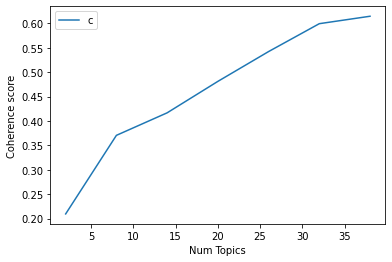

In [27]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [28]:
# Printing the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2095
Num Topics = 8  has Coherence Value of 0.3706
Num Topics = 14  has Coherence Value of 0.4167
Num Topics = 20  has Coherence Value of 0.4812
Num Topics = 26  has Coherence Value of 0.5423
Num Topics = 32  has Coherence Value of 0.5995
Num Topics = 38  has Coherence Value of 0.6147


In [32]:
# Selecting the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.051*"show" + 0.029*"expect" + 0.028*"chapter" + 0.027*"feel" + '
  '0.023*"complet" + 0.016*"movi" + 0.015*"rest" + 0.014*"height" + '
  '0.014*"start" + 0.014*"lose"'),
 (1,
  '0.181*"action" + 0.123*"good" + 0.066*"movi" + 0.065*"hour" + 0.056*"time" '
  '+ 0.027*"wick" + 0.025*"great" + 0.024*"start" + 0.023*"charact" + '
  '0.021*"point"'),
 (2,
  '0.026*"film" + 0.022*"dumb" + 0.021*"chapter" + 0.012*"motiv" + '
  '0.012*"actual" + 0.012*"anyth" + 0.012*"overthetop" + 0.012*"place" + '
  '0.012*"setpiec" + 0.012*"success"'),
 (3,
  '0.059*"kill" + 0.050*"everyon" + 0.049*"great" + 0.047*"film" + '
  '0.045*"idea" + 0.039*"count" + 0.038*"bullet" + 0.035*"man" + 0.035*"bodi" '
  '+ 0.034*"suit"'),
 (4,
  '0.045*"wick" + 0.038*"action" + 0.030*"film" + 0.030*"high" + 0.025*"time" '
  '+ 0.023*"stori" + 0.022*"rich" + 0.022*"compliment" + 0.020*"good" + '
  '0.015*"write"'),
 (5,
  '0.039*"good" + 0.034*"film" + 0.034*"long" + 0.025*"craft" + 0.024*"usual" '
  '+ 0.024*"sto

In [33]:
#sumerising the topics
def summarize_topics(model, words):
    topics = model.show_topics(num_topics=-1, num_words=words, formatted=False)
    topics_list = []
    for topic_id, topic in topics:
        topic_words = [w for w, prob in topic]
        topics_list.append(f"Topic {topic_id}: {', '.join(topic_words)}")
    return topics_list

optimal_model = model_list[3] 

topics_list = summarize_topics(optimal_model, words=10)
for t in topics_list[:10]:
    print(t)


Topic 0: show, expect, chapter, feel, complet, movi, rest, height, start, lose
Topic 1: action, good, movi, hour, time, wick, great, start, charact, point
Topic 2: film, dumb, chapter, motiv, actual, anyth, overthetop, place, setpiec, success
Topic 3: kill, everyon, great, film, idea, count, bullet, man, bodi, suit
Topic 4: wick, action, film, high, time, stori, rich, compliment, good, write
Topic 5: good, film, long, craft, usual, storylin, differ, view, complet, success
Topic 6: great, everi, watch, fight, unbeliev, computergener, impress, action, involv, day
Topic 7: action, feel, movi, scene, everi, time, fight, view, shot, learn
Topic 8: peopl, make, lot, end, wick, stori, move, plot, forward, hour
Topic 9: movi, bad, decent, watch, dumb, feel, act, hour, thing, give


In [34]:
# Printing the top topics and associated words
top_topics = lda_model.print_topics(num_topics=10, num_words=5)
for topic in top_topics:
    print(topic)

(15, '0.001*"notch" + 0.001*"particular" + 0.001*"limitless" + 0.001*"number" + 0.001*"journey"')
(9, '0.001*"notch" + 0.001*"particular" + 0.001*"limitless" + 0.001*"number" + 0.001*"journey"')
(2, '0.040*"get" + 0.040*"script" + 0.020*"guess" + 0.020*"forget" + 0.020*"sequel"')
(7, '0.064*"film" + 0.052*"get" + 0.031*"bad" + 0.021*"hour" + 0.021*"fight"')
(5, '0.055*"film" + 0.039*"go" + 0.024*"incred" + 0.024*"hour" + 0.024*"sequenc"')
(3, '0.024*"action" + 0.018*"well" + 0.018*"know" + 0.018*"film" + 0.018*"say"')
(12, '0.036*"action" + 0.026*"also" + 0.021*"well" + 0.021*"wick" + 0.016*"come"')
(13, '0.026*"action" + 0.026*"film" + 0.026*"good" + 0.026*"even" + 0.026*"well"')
(14, '0.030*"wick" + 0.024*"get" + 0.024*"shoot" + 0.024*"much" + 0.024*"head"')
(6, '0.049*"action" + 0.030*"get" + 0.024*"great" + 0.018*"good" + 0.018*"also"')


## Alternative appraoch

In [46]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import make_pipeline


In [38]:
df = pd.read_csv("Annotated_John_wick_Reviews.csv")
df.head()

,document_id,clean_text,sentiment
0,0,imagin video game shoot bad guy hardwar old ev...,negative
1,1,tabl intern crminal brotherhood condemn john w...,positive
2,2,first three john wick film came fairli quick s...,neutral
3,3,john wick movi sort fun sen unintellig violent...,negative
4,4,went cinema great expect admit photographi gor...,positive


In [39]:
df.drop("document_id",axis=1,inplace=True)

In [40]:
df.head()

,clean_text,sentiment
0,imagin video game shoot bad guy hardwar old ev...,negative
1,tabl intern crminal brotherhood condemn john w...,positive
2,first three john wick film came fairli quick s...,neutral
3,john wick movi sort fun sen unintellig violent...,negative
4,went cinema great expect admit photographi gor...,positive


In [51]:
# Features (text representation) used for topic modeling
clean_data = df['clean_text']

In [52]:
vect = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [53]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model = make_pipeline(vectorizer, lda)

# Fitting the LDA model
lda_model.fit(clean_data)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')),
                ('latentdirichletallocation',
                 LatentDirichletAllocation(random_state=42))])

In [54]:
# printing top 10 words for the each topic in the data
f_label = vectorizer.get_feature_names_out()
for t_index, topic in enumerate(lda.components_):
    t_words_index = topic.argsort()[:-11:-1]
    t_kywds = [f_label[i] for i in t_words_index]
    print(f"Topic {t_index + 1}: {', '.join(t_kywds)}")

Topic 1: lot, keanu, reev, impress, computergener, stunt, choreographi, unbeliev, peopl, work
Topic 2: dumb, movi, entertain, nonsens, act, instal, decent, motiv, setpiec, oh
Topic 3: action, genr, like, movi, flaw, seen, mani, scene, rich, compliment
Topic 4: film, action, set, nightclub, role, new, movi, standard, star, reev
Topic 5: film, count, matrix, prais, old, cinemat, slow, autoaim, make, sen
Topic 6: film, got, john, dont, look, time, ok, comic, wrong, bathroom
Topic 7: head, movi, long, film, seri, storylin, hour, nonsens, score, select
Topic 8: clich, bland, wors, movi, rd, suit, jacket, idea, know, warrior
Topic 9: deserv, cardboard, craft, perform, better, reev, film, mayb, outa, quantiti
Topic 10: action, chapter, john, kill, franchis, bang, film, best, bullet, realli


In [57]:
# Summarize and describe the topic for each cluster
df['topics_sequence'] = lda_model.transform(clean_data).argmax(axis=1)
top_topics_summary = df.groupby('topics_sequence')['clean_text'].agg(lambda x: ' '.join(x)).reset_index()
print(top_topics_summary)

   topics_sequence                                         clean_text
0                0  american action flick releas day poor screenpl...
1                1  john wick movi sort fun sen unintellig violent...
2                2  half review gush action wow wow complet awe mu...
3                3  know expect john wick movi thought franchis lo...
4                4  imagin video game shoot bad guy hardwar old ev...
5                5  time hybrid comic bookvideo game stupid plot w...
6                6  rave movi felt lack decent storylin hour min f...
7                7  went cinema great expect admit photographi gor...
8                8  tabl intern crminal brotherhood condemn john w...
9                9  first three john wick film came fairli quick s...


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [1]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [2]:
#Loading Data
df = pd.read_csv("Annotated_John_wick_Reviews.csv")
df.head()

,document_id,clean_text,sentiment
0,0,imagin video game shoot bad guy hardwar old ev...,negative
1,1,tabl intern crminal brotherhood condemn john w...,positive
2,2,first three john wick film came fairli quick s...,neutral
3,3,john wick movi sort fun sen unintellig violent...,negative
4,4,went cinema great expect admit photographi gor...,positive


In [3]:
# checking value count of each class in sentiment column
df["sentiment"].value_counts()

sentiment
positive    700
negative    450
neutral     100
Name: count, dtype: int64

/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


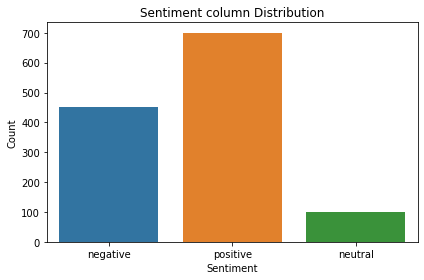

In [4]:
sns.countplot(x="sentiment", data=df)
# labels and title
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment column Distribution")
plt.tight_layout()

In [5]:
# Splitting the data into features (X) and target(y)
X = df['clean_text']
y = df['sentiment']

In [6]:
# Converting text data to numerical using CountVectorizer
v = CountVectorizer()
X_v = v.fit_transform(X)

In [7]:
# Label encoding the target column'sentiment'
lb_en = LabelEncoder()
y_en = lb_en.fit_transform(y)

/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [8]:
y_en

array([0, 2, 1, ..., 2, 2, 2])

In [9]:
# Naive Bayes Classifier (classifier-1)
naive_bayes_clf = MultinomialNB()

# XGBoost Classifier (classifier-2)
xgboost_clf = XGBClassifier()

# Creating a function for cross-validation with  Evalution metrics
def cross_validation(model, X, y, cv):
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision_macro')
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall_macro')
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')
    return accuracy, precision, recall, f1

In [10]:
# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# CV for Naive Bayes Classifier (classifier-1)
nb_output = cross_validation(naive_bayes_clf, X_v, y_en, kf)

# CV for XGBoost Classifier (classifier-2)
xgboost_output = cross_validation(xgboost_clf, X_v, y_en, kf)

In [11]:
nb_output

(array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]))

In [12]:
xgboost_output

(array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]))

In [13]:
print("Naive Bayes Classifier Results:")
print("Accuracy:", nb_output[0].mean())
print("Precision:", nb_output[1].mean())
print("Recall:", nb_output[2].mean())
print("F1 Score:", nb_output[3].mean())
print("\n")
print("XGBoost Classifier Results:")
print("Accuracy:", xgboost_output[0].mean())
print("Precision:", xgboost_output[1].mean())
print("Recall:", xgboost_output[2].mean())
print("F1 Score:", xgboost_output[3].mean())

Naive Bayes Classifier Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


XGBoost Classifier Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


After evaluating the performance of the Naive Bayes and XGBoost classifiers, Both of these models exhibit remarkable performance across a multiple metrics.

The Naive Bayes classifier achieves an excellent score of 1.0 for all of its metrics, including accuracy, precision, recall, and F1 score. despite this, the model is able to make perfect predictions, precisely categorise instances with precision, capture all instances that are relevant with recall, and establish a harmonic balance between precision and recall with F1 score.

Similarly, the XGBoost classifier achieves a perfect score of 1.0 for accuracy, precision, recall, and F1 score, following in the footsteps of this extraordinary accomplishment. This impressive result demonstrates that the XGBoost algorithm is successful in properly categorising sentiment for my dataset.

Both classifiers have an impressive capacity to generalise and generate correct predictions based on the sentiment data that is presented. The fact that these findings indicate that the models are capable of performing well in terms of sentiment categorization demonstrates that they are suitable for the task at concern.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.


In [1]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 9999)

In [2]:
path = 'data_description.txt'
try:
    with open(path, 'r') as f:
        file_cont = f.read()
        print(file_cont)
except FileNotFoundError:
    print(f"File '{path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
#Loading Training data
train_df = pd.read_csv("train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
#checking shape of train_df and test_df
train_df.shape

(1460, 76)

In [5]:
#checking concise summary of dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking statistical summary of dataframe
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
#checking for null values
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
for col in train_df.columns:
    null_count = train_df[col].isnull().sum()
    print(f"'{col}' {null_count}.")

'Id' 0.
'MSSubClass' 0.
'MSZoning' 0.
'LotFrontage' 259.
'LotArea' 0.
'Street' 0.
'Alley' 1369.
'LotShape' 0.
'LandContour' 0.
'Utilities' 0.
'LotConfig' 0.
'LandSlope' 0.
'Neighborhood' 0.
'Condition1' 0.
'Condition2' 0.
'BldgType' 0.
'HouseStyle' 0.
'OverallQual' 0.
'OverallCond' 0.
'YearBuilt' 0.
'YearRemodAdd' 0.
'RoofStyle' 0.
'RoofMatl' 0.
'Exterior1st' 0.
'Exterior2nd' 0.
'MasVnrType' 872.
'MasVnrArea' 8.
'ExterQual' 0.
'ExterCond' 0.
'Foundation' 0.
'BsmtQual' 37.
'BsmtCond' 37.
'BsmtExposure' 38.
'BsmtFinType1' 37.
'BsmtFinSF1' 0.
'BsmtFinType2' 38.
'BsmtFinSF2' 0.
'BsmtUnfSF' 0.
'TotalBsmtSF' 0.
'Heating' 0.
'HeatingQC' 0.
'CentralAir' 0.
'Electrical' 1.
'1stFlrSF' 0.
'2ndFlrSF' 0.
'LowQualFinSF' 0.
'GrLivArea' 0.
'BsmtFullBath' 0.
'BsmtHalfBath' 0.
'FullBath' 0.
'HalfBath' 0.
'BedroomAbvGr' 0.
'KitchenAbvGr' 0.
'KitchenQual' 0.
'TotRmsAbvGrd' 0.
'Functional' 0.
'Fireplaces' 0.
'FireplaceQu' 690.
'GarageType' 81.
'GarageYrBlt' 81.
'GarageFinish' 81.
'GarageCars' 0.
'GarageAre

In [9]:
a=list(train_df.columns)
b=[]
for i in a:
    c=train_df[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
Feature name,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
no. of Nan,0,0,0,259,0,0,1369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,872,8,0,0,0,37,37,38,37,0,38,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,690,81,81,81,0,0,81,81,0,0,0,0,0,0,0,1453,1179,1406,0,0,0,0,0,0


In [10]:
# Setting the threshold for missing values
threshold_percentage = 50

# Calculating the threshold count based on the percentage
threshold_count = (threshold_percentage / 100) * len(train_df)

# Identifying the columns with more than 50% missing values
columns_with_missing_values = train_df.columns[train_df.isnull().sum() > threshold_count]

# Printing the columns
print(f"Columns with more than {threshold_percentage}% missing values:")
print(columns_with_missing_values)

Columns with more than 50% missing values:
Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [11]:
train_df.drop(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)

In [12]:
train_df.shape

(1460, 76)

In [15]:
# Identify numeric columns
numeric_cols = train_df.select_dtypes(include='number').columns

# Replace missing values with mean for numeric columns
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].mean())


train_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [16]:
# Identifying string columns
string_col = train_df.select_dtypes(include='object').columns
# Replacing missing values with the most frequent value for string columns
train_df[string_col] = train_df[string_col].apply(lambda x: x.fillna(x.mode().iloc[0]))
train_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

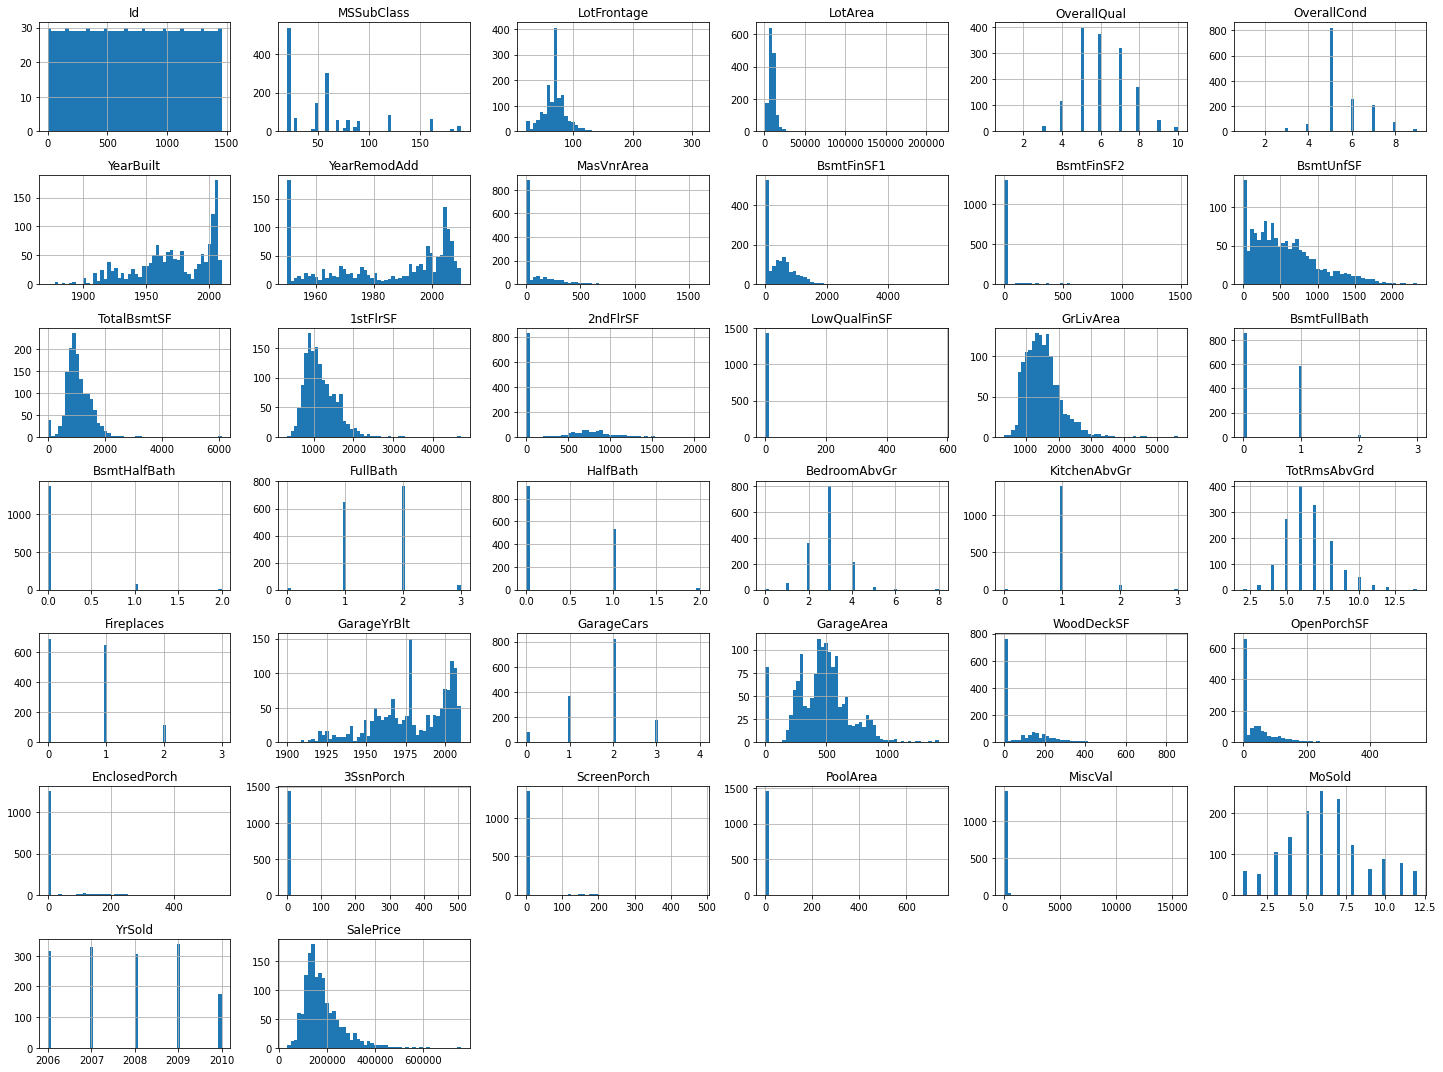

In [17]:
train_df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [18]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenP

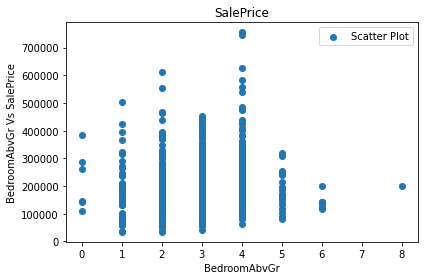

In [19]:
#scatter plot
plt.scatter(train_df["BedroomAbvGr"],train_df["SalePrice"], label='Scatter Plot')

# Addings labels and a title
plt.xlabel('BedroomAbvGr')
plt.ylabel('BedroomAbvGr Vs SalePrice')
plt.title('SalePrice')
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
# Select columns with string (object) data type
string_columns = train_df.select_dtypes(include='object').columns
print(string_columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [21]:
len(string_columns)

38

In [22]:
len(numeric_cols)

38

In [23]:
len(train_df.columns)

76

In [24]:
train_df1 = train_df.copy()

In [25]:
train_df1["MSZoning"]

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [26]:
len(train_df1.columns)

76

In [27]:

from sklearn.preprocessing import LabelEncoder

# Identifying string columns
string_columns = train_df1.select_dtypes(include='object').columns

# Performing Label Encoding
label_encoder = LabelEncoder()
for column in string_columns:
    train_df1[column + '_LabelEncoded'] = label_encoder.fit_transform(train_df1[column])
    train_df1.drop(column, axis=1, inplace=True)


train_df1.head()


/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_LabelEncoded,Street_LabelEncoded,LotShape_LabelEncoded,LandContour_LabelEncoded,Utilities_LabelEncoded,LotConfig_LabelEncoded,LandSlope_LabelEncoded,Neighborhood_LabelEncoded,Condition1_LabelEncoded,Condition2_LabelEncoded,BldgType_LabelEncoded,HouseStyle_LabelEncoded,RoofStyle_LabelEncoded,RoofMatl_LabelEncoded,Exterior1st_LabelEncoded,Exterior2nd_LabelEncoded,ExterQual_LabelEncoded,ExterCond_LabelEncoded,Foundation_LabelEncoded,BsmtQual_LabelEncoded,BsmtCond_LabelEncoded,BsmtExposure_LabelEncoded,BsmtFinType1_LabelEncoded,BsmtFinType2_LabelEncoded,Heating_LabelEncoded,HeatingQC_LabelEncoded,CentralAir_LabelEncoded,Electrical_LabelEncoded,KitchenQual_LabelEncoded,Functional_LabelEncoded,FireplaceQu_LabelEncoded,GarageType_LabelEncoded,GarageFinish_LabelEncoded,GarageQual_LabelEncoded,GarageCond_LabelEncoded,PavedDrive_LabelEncoded,SaleType_LabelEncoded,SaleCondition_LabelEncoded
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,3,2,5,1,0,1,4,2,6,2,1,1,4,4,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4


In [28]:
string_columns = train_df1.select_dtypes(include='object').columns
string_columns

Index([], dtype='object')

In [29]:
train_df1.shape

(1460, 76)

In [30]:
# correlation matrix
correlation_matrix = train_df1.corr().abs()
correlation_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_LabelEncoded,Street_LabelEncoded,LotShape_LabelEncoded,LandContour_LabelEncoded,Utilities_LabelEncoded,LotConfig_LabelEncoded,LandSlope_LabelEncoded,Neighborhood_LabelEncoded,Condition1_LabelEncoded,Condition2_LabelEncoded,BldgType_LabelEncoded,HouseStyle_LabelEncoded,RoofStyle_LabelEncoded,RoofMatl_LabelEncoded,Exterior1st_LabelEncoded,Exterior2nd_LabelEncoded,ExterQual_LabelEncoded,ExterCond_LabelEncoded,Foundation_LabelEncoded,BsmtQual_LabelEncoded,BsmtCond_LabelEncoded,BsmtExposure_LabelEncoded,BsmtFinType1_LabelEncoded,BsmtFinType2_LabelEncoded,Heating_LabelEncoded,HeatingQC_LabelEncoded,CentralAir_LabelEncoded,Electrical_LabelEncoded,KitchenQual_LabelEncoded,Functional_LabelEncoded,FireplaceQu_LabelEncoded,GarageType_LabelEncoded,GarageFinish_LabelEncoded,GarageQual_LabelEncoded,GarageCond_LabelEncoded,PavedDrive_LabelEncoded,SaleType_LabelEncoded,SaleCondition_LabelEncoded
Id,1.000000,0.011156,0.009601,0.033226,0.028365,0.012609,0.012713,0.021998,0.050199,0.005024,0.005968,0.007940,0.015415,0.010496,0.005590,0.044230,0.008273,0.002289,0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,0.019772,0.000070,0.016570,0.017634,0.029643,0.000477,0.002889,0.046635,0.001330,0.057044,0.006242,0.021172,0.000712,0.021917,0.006096,0.008916,0.032122,0.019659,1.332409e-02,0.049756,0.005847,0.013735,0.003815,0.001839,0.021912,0.018111,0.038675,0.022562,0.034694,0.042847,0.001689,0.029826,0.008514,0.051070,0.006762,0.024613,0.014204,0.045159,0.042120,0.002157,0.009821,0.037632,0.004432,0.001064,0.004644,0.000195,0.011390,0.003230,0.018025,0.005971,0.019773,0.005806
MSSubClass,0.011156,1.000000,0.357056,0.139781,0.032628,0.059316,0.027850,0.040581,0.022895,0.069836,0.065649,0.140759,0.238518,0.251758,0.307886,0.046474,0.074853,0.003491,0.002333,0.131608,0.177354,0.023438,0.281721,0.040380,0.045569,0.080187,0.040110,0.098672,0.012579,0.006100,0.012037,0.043825,0.026030,0.008283,0.007683,0.013585,0.021407,0.084284,0.035900,0.024969,0.119289,0.002940,2.284384e-02,0.075910,0.025672,0.005985,0.024762,0.042395,0.746063,0.397161,0.117817,0.031336,0.089159,0.137229,0.017161,0.003254,0.058126,0.041065,0.013652,0.064221,0.016599,0.041195,0.048009,0.020760,0.101774,0.051945,0.010129,0.003711,0.033443,0.090719,0.012301,0.007630,0.002927,0.059925,0.012464,0.024940
LotFrontage,0.009601,0.357056,1.000000,0.306795,0.234196,0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,0.006419,0.180424,0.048258,0.237023,0.005805,0.320146,0.235755,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901,0.106363,0.037323,0.144931,0.075647,5.447825e-18,0.181253,0.067608,0.084545,0.008483,0.003214,0.408564,0.031907,0.153467,0.082026,0.074448,0.098756,0.183293,0.047951,0.098809,0.168367,0.051534,0.124127,0.025233,0.026775,0.020815,0.079975,0.068666,0.060213,0.189082,0.030250,0.059456,0.217793,0.212056,0.051108,0.043163,0.089073,0.030846,0.058464
LotArea,0.033226,0.139781,0.306795,1.000000,0.105806,0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,0.017784,0.190015,0.271364,0.024812,0.154871,0.180403,0.171698,0.084774,0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261,0.263843,0.034452,0.197131,0.165315,0.149083,1.012318e-02,0.121161,0.436868,0.044569,0.023846,0.022164,0.205721,0.033190,0.077054,0.149837,0.004256,0.003930,0.057275,0.015160,0.011081,0.065150,0.012366,0.141043,0.061880,0.068954,0.028158,0.004212,0.049755,0.043

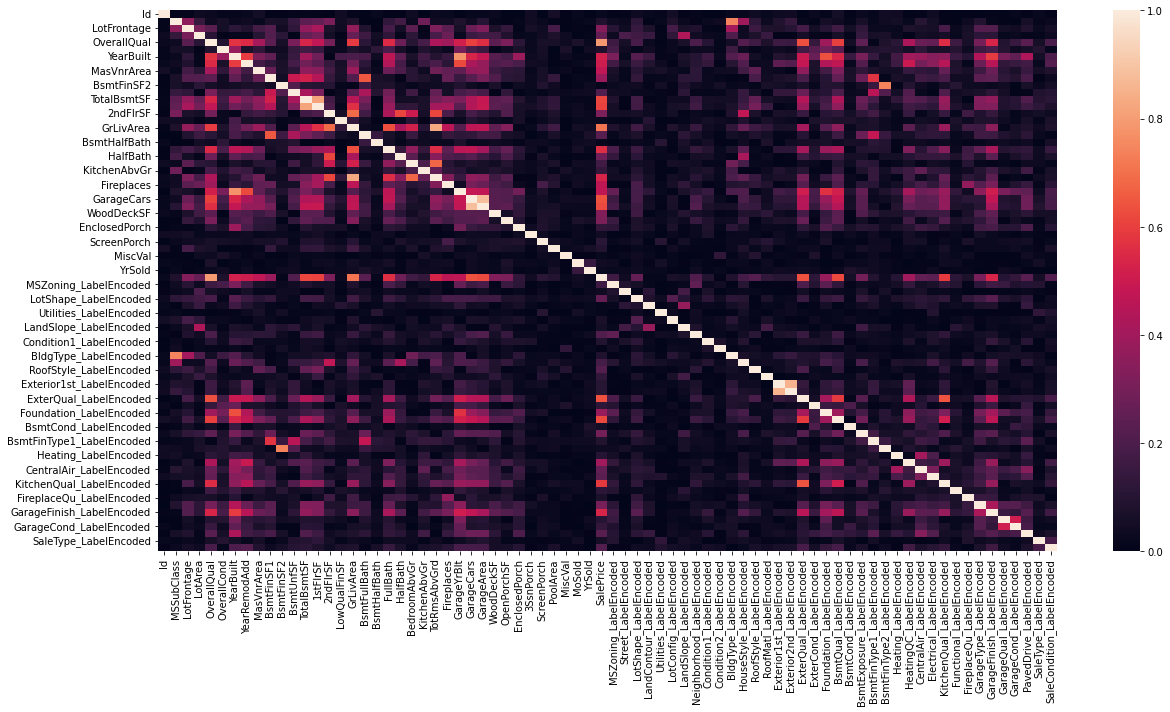

In [31]:
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix)
plt.tight_layout()

In [32]:
# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# Find columns with correlation greater than 0.7
highly_correlated_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.7)]

# Keep 'SalePrice' and remove other highly correlated columns
columns_to_keep = ['SalePrice'] + [column for column in train_df1.columns if column not in highly_correlated_columns]
train_df1 = train_df1[columns_to_keep]

train_df1.head()

,SalePrice,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_LabelEncoded,Street_LabelEncoded,LotShape_LabelEncoded,LandContour_LabelEncoded,Utilities_LabelEncoded,LotConfig_LabelEncoded,LandSlope_LabelEncoded,Neighborhood_LabelEncoded,Condition1_LabelEncoded,Condition2_LabelEncoded,HouseStyle_LabelEncoded,RoofStyle_LabelEncoded,RoofMatl_LabelEncoded,Exterior1st_LabelEncoded,ExterQual_LabelEncoded,ExterCond_LabelEncoded,Foundation_LabelEncoded,BsmtQual_LabelEncoded,BsmtCond_LabelEncoded,BsmtExposure_LabelEncoded,BsmtFinType1_LabelEncoded,Heating_LabelEncoded,HeatingQC_LabelEncoded,CentralAir_LabelEncoded,Electrical_LabelEncoded,KitchenQual_LabelEncoded,Functional_LabelEncoded,FireplaceQu_LabelEncoded,GarageType_LabelEncoded,GarageFinish_LabelEncoded,GarageQual_LabelEncoded,GarageCond_LabelEncoded,PavedDrive_LabelEncoded,SaleType_LabelEncoded,SaleCondition_LabelEncoded
0,208500,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,2,0,61,0,0,0,0,0,2,2008,3,1,3,3,0,4,0,5,2,2,5,1,1,12,2,4,2,2,3,3,2,1,0,1,4,2,6,2,1,1,4,4,2,8,4
1,181500,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,0,0,1262,0,1,2,0,3,1,1,2,298,0,0,0,0,0,0,5,2007,3,1,3,3,0,2,0,24,1,2,2,1,1,8,3,4,1,2,3,1,0,1,0,1,4,3,6,4,1,1,4,4,2,8,4
2,223500,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,866,0,1786,1,0,2,1,3,1,1,2,0,42,0,0,0,0,0,9,2008,3,1,0,3,0,4,0,5,2,2,5,1,1,12,2,4,2,2,3,2,2,1,0,1,4,2,6,4,1,1,4,4,2,8,4
3,140000,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,756,0,1717,1,0,1,0,3,1,1,3,0,35,272,0,0,0,0,2,2006,3,1,0,3,0,0,0,6,2,2,5,1,1,13,3,4,0,3,1,3,0,1,2,1,4,2,6,2,5,2,4,4,2,8,0
4,250000,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,4,1,1,3,192,84,0,0,0,0,0,12,2008,3,1,0,3,0,2,0,15,2,2,5,1,1,12,2,4,2,2,3,0,2,1,0,1,4,2,6,4,1,1,4,4,2,8,4


In [33]:
highly_correlated_columns

['1stFlrSF',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'SalePrice',
 'BldgType_LabelEncoded',
 'Exterior2nd_LabelEncoded',
 'BsmtFinType2_LabelEncoded']

In [34]:
train_df1.shape

(1460, 69)

In [35]:
len(train_df1.columns)

69

In [36]:
# Splitting the dataset into features (X) and target variable (y)
X = train_df1.drop(["Id", "SalePrice"], axis=1)
y = train_df1["SalePrice"]

In [37]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_LabelEncoded,Street_LabelEncoded,LotShape_LabelEncoded,LandContour_LabelEncoded,Utilities_LabelEncoded,LotConfig_LabelEncoded,LandSlope_LabelEncoded,Neighborhood_LabelEncoded,Condition1_LabelEncoded,Condition2_LabelEncoded,HouseStyle_LabelEncoded,RoofStyle_LabelEncoded,RoofMatl_LabelEncoded,Exterior1st_LabelEncoded,ExterQual_LabelEncoded,ExterCond_LabelEncoded,Foundation_LabelEncoded,BsmtQual_LabelEncoded,BsmtCond_LabelEncoded,BsmtExposure_LabelEncoded,BsmtFinType1_LabelEncoded,Heating_LabelEncoded,HeatingQC_LabelEncoded,CentralAir_LabelEncoded,Electrical_LabelEncoded,KitchenQual_LabelEncoded,Functional_LabelEncoded,FireplaceQu_LabelEncoded,GarageType_LabelEncoded,GarageFinish_LabelEncoded,GarageQual_LabelEncoded,GarageCond_LabelEncoded,PavedDrive_LabelEncoded,SaleType_LabelEncoded,SaleCondition_LabelEncoded
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,2,0,61,0,0,0,0,0,2,2008,3,1,3,3,0,4,0,5,2,2,5,1,1,12,2,4,2,2,3,3,2,1,0,1,4,2,6,2,1,1,4,4,2,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,0,0,1262,0,1,2,0,3,1,1,2,298,0,0,0,0,0,0,5,2007,3,1,3,3,0,2,0,24,1,2,2,1,1,8,3,4,1,2,3,1,0,1,0,1,4,3,6,4,1,1,4,4,2,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,866,0,1786,1,0,2,1,3,1,1,2,0,42,0,0,0,0,0,9,2008,3,1,0,3,0,4,0,5,2,2,5,1,1,12,2,4,2,2,3,2,2,1,0,1,4,2,6,4,1,1,4,4,2,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,756,0,1717,1,0,1,0,3,1,1,3,0,35,272,0,0,0,0,2,2006,3,1,0,3,0,0,0,6,2,2,5,1,1,13,3,4,0,3,1,3,0,1,2,1,4,2,6,2,5,2,4,4,2,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,4,1,1,3,192,84,0,0,0,0,0,12,2008,3,1,0,3,0,2,0,15,2,2,5,1,1,12,2,4,2,2,3,0,2,1,0,1,4,2,6,4,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,694,0,1647,0,0,2,1,3,1,1,2,0,40,0,0,0,0,0,8,2007,3,1,3,3,0,4,0,8,2,2,5,1,1,12,3,4,2,2,3,3,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,0,0,2073,1,0,2,0,3,1,2,2,349,0,0,0,0,0,0,2,2010,3,1,3,3,0,4,0,14,2,2,2,1,1,9,3,4,1,2,3,3,0,1,4,1,4,3,2,4,1,2,4,4,2,8,4
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1152,0,2340,0,0,2,0,4,1,2,1,0,60,0,0,0,0,2500,5,2010,3,1,3,3,0,4,0,6,2,2,5,1,1,5,0,2,4,3,1,3,2,1,0,1,4,2,6,2,1,1,4,4,2,8,4
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,0,0,1078,1,0,1,0,2,1,0,1,366,0,112,0,0,0,0,4,2010,3,1,3,3,0,4,0,12,2,2,2,3,1,8,3,4,1,3,3,2,2,1,2,1,0,2,6,2,1,2,4,4,2,8,4


In [38]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error


# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Multilinear Regression model
linear_mdl = LinearRegression()
linear_mdl.fit(X_train, y_train)
y_pred_linear_mdl = linear_mdl.predict(X_test)

#Random Forest Regressor model
rf_mdl = RandomForestRegressor(random_state=42)
rf_mdl.fit(X_train, y_train)
y_pred_rf_mdl = rf_mdl.predict(X_test)

# XGBoost Regressor model
xgb_mdl = XGBRegressor(random_state=42)
xgb_mdl.fit(X_train, y_train)
y_pred_xgb_mdl = xgb_mdl.predict(X_test)

# Evaluating the models
r2_linear_mdl = r2_score(y_test, y_pred_linear_mdl)
mse_linear_mdl = mean_squared_error(y_test, y_pred_linear_mdl)

r2_rf_mdl = r2_score(y_test, y_pred_rf_mdl)
mse_rf_mdl = mean_squared_error(y_test, y_pred_rf_mdl)

r2_xgb_mdl = r2_score(y_test, y_pred_xgb_mdl)
mse_xgb_mdl = mean_squared_error(y_test, y_pred_xgb_mdl)

print("Multi-linear Regression:")
print("R2 Score:", r2_linear_mdl)
print("Mean Squared Error:", mse_linear_mdl)
print("\n")
print("Random Forest Regressor:")
print("R2 Score:", r2_rf_mdl)
print("Mean Squared Error:", mse_rf_mdl)
print("\n")
print("XGBoost Regressor:")
print("R2 Score:", r2_xgb_mdl)
print("Mean Squared Error:", mse_xgb_mdl)


/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be rem

Multi-linear Regression:
R2 Score: 0.8457892690439412
Mean Squared Error: 1182846611.0817404


Random Forest Regressor:
R2 Score: 0.9019602309029884
Mean Squared Error: 751997010.251383


XGBoost Regressor:
R2 Score: 0.8670597355553309
Mean Squared Error: 1019695194.3603319


/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a fu

In [76]:
# predictions on test_df
# Loading Testing data
test_df = pd.read_csv("test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [77]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [79]:
test_df.drop(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)

In [80]:
test_df.shape

(1459, 75)

In [81]:
from sklearn.preprocessing import LabelEncoder


# Identifying string columns
string_columns = test_df.select_dtypes(include='object').columns



# Performing Label Encoding
label_encoder = LabelEncoder()
for column in string_columns:
    test_df[column + '_LabelEncoded'] = label_encoder.fit_transform(test_df[column])
    test_df.drop(column, axis=1, inplace=True)


test_df.head()


/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_LabelEncoded,Street_LabelEncoded,LotShape_LabelEncoded,LandContour_LabelEncoded,Utilities_LabelEncoded,LotConfig_LabelEncoded,LandSlope_LabelEncoded,Neighborhood_LabelEncoded,Condition1_LabelEncoded,Condition2_LabelEncoded,BldgType_LabelEncoded,HouseStyle_LabelEncoded,RoofStyle_LabelEncoded,RoofMatl_LabelEncoded,Exterior1st_LabelEncoded,Exterior2nd_LabelEncoded,ExterQual_LabelEncoded,ExterCond_LabelEncoded,Foundation_LabelEncoded,BsmtQual_LabelEncoded,BsmtCond_LabelEncoded,BsmtExposure_LabelEncoded,BsmtFinType1_LabelEncoded,BsmtFinType2_LabelEncoded,Heating_LabelEncoded,HeatingQC_LabelEncoded,CentralAir_LabelEncoded,Electrical_LabelEncoded,KitchenQual_LabelEncoded,Functional_LabelEncoded,FireplaceQu_LabelEncoded,GarageType_LabelEncoded,GarageFinish_LabelEncoded,GarageQual_LabelEncoded,GarageCond_LabelEncoded,PavedDrive_LabelEncoded,SaleType_LabelEncoded,SaleCondition_LabelEncoded
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,2,1,3,3,0,4,0,12,1,2,0,2,1,0,10,12,3,4,1,3,3,3,4,3,0,4,1,3,3,6,5,1,2,3,4,2,8,4
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,3,1,0,3,0,0,0,12,2,2,0,2,3,0,11,13,3,4,1,3,3,3,0,5,0,4,1,3,2,6,5,1,2,3,4,2,8,4
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,3,1,0,3,0,4,0,8,2,2,0,4,1,0,10,12,3,4,2,2,3,3,2,5,0,2,1,3,3,6,4,1,0,3,4,2,8,4
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,3,1,0,3,0,4,0,8,2,2,0,4,1,0,10,12,3,4,2,3,3,3,2,5,0,0,1,3,2,6,2,1,0,3,4,2,8,4
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,3,1,0,1,0,4,0,22,2,2,4,2,1,0,6,6,2,4,2,2,3,3,0,5,0,0,1,3,2,6,5,1,1,3,4,2,8,4


In [82]:
test_df.shape

(1459, 75)

In [85]:

b = ["Id",'1stFlrSF',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'BldgType_LabelEncoded',
 'Exterior2nd_LabelEncoded',
 'BsmtFinType2_LabelEncoded']

In [86]:
test_df.drop(b,axis=1,inplace=True)

In [90]:

test_df.fillna(test_df.mean(), inplace=True)

In [91]:
test_df.shape

(1459, 67)

In [92]:
#Predictions for Multilinear Regression model
y1_pred_linear_mdl = linear_mdl.predict(test_df)

#Predictions for Random Forest Regressor model
y1_pred_rf_mdl = rf_mdl.predict(test_df)

# Predictions for XGBoost Regressor model
y1_pred_xgb_mdl = xgb_mdl.predict(test_df)

/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be rem

In [93]:
y1_pred_linear_mdl

array([ 98853.16907101, 147928.7985703 , 166034.43739508, ...,
       133941.67522899,  97384.96912389, 244843.28186773])

In [94]:
y1_pred_rf_mdl

array([126868.5 , 155629.  , 179309.72, ..., 156075.  , 125984.64,
       223353.57])

In [95]:
y1_pred_xgb_mdl

array([123016.64, 156634.22, 180711.33, ..., 176042.45, 125296.26,
       215921.48], dtype=float32)

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **pre-trained Large Language Model (LLM) from the Hugging Face Repository** for your specific task using the data collected in Assignment 3. After creating an account on Hugging Face (https://huggingface.co/), choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any Meta based text analysis model. Provide a brief description of the selected LLM, including its original sources, significant parameters, and any task-specific fine-tuning if applied.

Perform a detailed analysis of the LLM's performance on your task, including key metrics, strengths, and limitations. Additionally, discuss any challenges encountered during the implementation and potential strategies for improvement. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [13]:
# Write your code here
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import torch.nn.functional as F

In [2]:
df = pd.read_csv("Annotated_John_wick_Reviews.csv")
df.head()

,document_id,clean_text,sentiment
0,0,imagin video game shoot bad guy hardwar old ev...,negative
1,1,tabl intern crminal brotherhood condemn john w...,positive
2,2,first three john wick film came fairli quick s...,neutral
3,3,john wick movi sort fun sen unintellig violent...,negative
4,4,went cinema great expect admit photographi gor...,positive


In [5]:
df.drop("document_id",axis=1,inplace=True)

In [6]:
df.head()

,clean_text,sentiment
0,imagin video game shoot bad guy hardwar old ev...,negative
1,tabl intern crminal brotherhood condemn john w...,positive
2,first three john wick film came fairli quick s...,neutral
3,john wick movi sort fun sen unintellig violent...,negative
4,went cinema great expect admit photographi gor...,positive


In [7]:
df["sentiment"].unique()

array(['negative', 'positive', 'neutral'], dtype=object)

In [9]:
# Splitting the df into training & testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [15]:
# Loading BERT tokenizer &  model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df["sentiment"].unique()))

# Tokenizing  training and testing features
train_en = tokenizer(list(train_df['clean_text']), truncation=True, padding=True, max_length=128, return_tensors='pt')
test_en = tokenizer(list(test_df['clean_text']), truncation=True, padding=True, max_length=128, return_tensors='pt')

# making the training and testing datasets to give inputs into models
training_dataset = torch.utils.data.TensorDataset(train_en['input_ids'], train_en['attention_mask'],
                                               torch.tensor(train_df['sentiment'].astype('category').cat.codes.values))
testing_dataset = torch.utils.data.TensorDataset(test_en['input_ids'], test_en['attention_mask'],
                                              torch.tensor(test_df['sentiment'].astype('category').cat.codes.values))

# training and testing data loaders
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=8, shuffle=True)
testing_loader = torch.utils.data.DataLoader(testing_dataset, batch_size=8, shuffle=False)

# defining optimizer, scheduler
opt = AdamW(model.parameters(), lr=2e-5)
s = get_linear_schedule_with_warmup(opt, num_warmup_steps=0, num_training_steps=len(training_loader) * 3)

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(3):
    model.train()
    for batch in training_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device).long()  # Convert labels to Long
       
        opt.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = F.cross_entropy(logits, labels)
        loss.backward()
        opt.step()
        s.step()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [17]:
# Evaluation on test_df
model.eval()
all_preds, all_labels = [], []

for batch in testing_loader:
    input_ids, attention_mask, labels = batch
    input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).cpu().numpy()
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

In [18]:
# evaluting accuracy and classification report
accuracy = accuracy_score(all_labels, all_preds)
classification_report_result = classification_report(all_labels, all_preds, target_names=df["sentiment"].unique())

In [19]:
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [20]:
print("Classification Report:\n", classification_report_result)

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00        85
    positive       1.00      1.00      1.00        26
     neutral       1.00      1.00      1.00       139

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



The abbreviation BERT stands for "Bidirectional Encoder Representations from Transformers," and it refers to a sophisticated natural language processing (NLP) model that has been painstakingly developed to pre-train deep bidirectional representations from unannotated text. When it comes to the conditioning process, its capacity to concurrently take into account both the left and right contexts is what sets it apart from other forms of conditioning. The pre-trained BERT model may thus be fine-tuned in an effective manner by adding a single extra output layer to the model. By virtue of this exceptional versatility, cutting-edge models that are capable of succeeding in a wide variety of NLP tasks may be created.

Significant Parameters:

1. Do Lower Case: 
The do_lower_case parameter may be set to either true or false, allowing you to choose between "uncased" and "cased" variants of the BERT model. Lowercasing the text and eliminating accent marks are both components of the uncased format.

2. Maximum Sequence Length:

-In order to identify the maximum number of tokens that may be included in the input, set max_seq_length.

-When it comes to truncation or padding, it is recommended to make use of powers of two, such as 64, 128, and 512.

3. Train Batch Size:

There were a certain amount of samples that were processed before the model was updated. The use of higher batch sizes (in powers of two, such as 512, 1024, or 2048) is recommended for the generation of reliable gradient estimations.

4. Learning Rate:
A positive scalar that indicates the magnitude of the training step.
Learn at your own pace; if you go too slow, you run the danger of becoming stuck with a high error, and if your learning rate is too big, you could unintentionally raise the training error.



Performance Analysis of my task:

The BERT model reveals outstanding performance, reaching excellent precision, recall, and F1-scores across all of the various sentiment types, which eventually culminates in an accuracy rate of 100%. This implies to a potential for sentiment categorization that is both very accurate and reliable.


Strengths

1. Performs effectively with short input sequences
2. open source  
3. A high level of accuracy for a variety of NLP jobs

Limitations

1. It is unable to process numerous inputs.
2. When there is a lengthy sequence, speed may be sluggish.
3. Performance issues with jobs that demand the use of long-term memory





Reference:
    
https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/

https://medium.com/analytics-vidhya/choosing-the-right-parameters-for-pre-training-bert-using-tpu-4584a598ca50

https://pareshmpatel.com/bert-or-chatgpt-the-pros-and-cons/
    

# Thank you!